In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from experiments_with_data import *
from test_ipf import *
from helper_methods_for_aggregate_data_analysis import *
from model_experiments import *

import matplotlib.pyplot as plt

Setting numpy cores to 1
Running code on turing1.stanford.edu; at Stanford=True


/dfs/scratch1/safegraph_homes/covid_mobility_venv/covid_mobility_venv/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Importing plotly failed. Interactive plots will not work.


# Synthetic data

In [3]:
# fixed across experiments
seed = 0
m, n = 100, 100
X = generate_X(m, n, dist='uniform', seed=seed)
expu, expv = generate_row_and_col_factors(m, n, scalar=4, seed=seed)
normalized_expu = expu / np.mean(expu)
normalized_expv = expv / np.mean(expv)

Sampling X from uniform distribution


## Compare IPF vs Poisson regression

In [4]:
# no sparsity
X = generate_X(dist='uniform', m=m, n=n, seed=seed, sparsity_rate=0, verbose=True)
Y = generate_hourly_network(X, expu, expv, model='basic', seed=seed)
p = np.sum(Y, axis=1)
q = np.sum(Y, axis=0)
print('zero rows:', np.sum(p == 0))
print('zero cols:', np.sum(q == 0))

Sampling X from uniform distribution
zero rows: 0
zero cols: 0


In [7]:
# higher sparsity, same u and v
# need positive marginals for comparison to Poisson
X2 = generate_X(dist='uniform', m=m, n=n, seed=2, sparsity_rate=0.5, exact_rate=True, verbose=True)
Y2 = generate_hourly_network(X2, expu, expv, model='basic', seed=seed)
p2 = np.sum(Y2, axis=1)
q2 = np.sum(Y2, axis=0)
print('zero rows:', np.sum(p2 == 0))
print('zero cols:', np.sum(q2 == 0))

Sampling X from uniform distribution
Num nonzero entries in X: 5000 out of 10000
zero rows: 0
zero cols: 0


In [8]:
i, row_factors, col_factors, row_errs, col_errs = do_ipf(X, p, q)

Running IPF for max 1000 iterations
Iter 0: row err = 0.0000, col err = 8714.9395
Iter 1: row err = 525.3587, col err = 0.0000
Iter 2: row err = 0.0000, col err = 49.5060
Iter 3: row err = 4.2300, col err = 0.0000
Iter 4: row err = 0.0000, col err = 0.4387
Iter 5: row err = 0.0493, col err = 0.0000
Iter 6: row err = 0.0000, col err = 0.0053
Iter 7: row err = 0.0007, col err = 0.0000
Iter 8: row err = 0.0000, col err = 0.0001
Iter 9: row err = 0.0000, col err = 0.0000
Iter 10: row err = 0.0000, col err = 0.0000
Iter 11: row err = 0.0000, col err = 0.0000
Iter 12: row err = 0.0000, col err = 0.0000
Iter 13: row err = 0.0000, col err = 0.0000
Iter 14: row err = 0.0000, col err = 0.0000
Converged; stopping after 14 iterations


In [9]:
i, row_factors2, col_factors2, row_errs, col_errs = do_ipf(X2, p2, q2)

Running IPF for max 1000 iterations
Iter 0: row err = 0.0000, col err = 4423.4620
Iter 1: row err = 408.7949, col err = 0.0000
Iter 2: row err = 0.0000, col err = 70.3593
Iter 3: row err = 13.9626, col err = 0.0000
Iter 4: row err = 0.0000, col err = 3.5259
Iter 5: row err = 0.8554, col err = 0.0000
Iter 6: row err = 0.0000, col err = 0.2414
Iter 7: row err = 0.0650, col err = 0.0000
Iter 8: row err = 0.0000, col err = 0.0193
Iter 9: row err = 0.0053, col err = 0.0000
Iter 10: row err = 0.0000, col err = 0.0016
Iter 11: row err = 0.0005, col err = 0.0000
Iter 12: row err = 0.0000, col err = 0.0001
Iter 13: row err = 0.0000, col err = 0.0000
Iter 14: row err = 0.0000, col err = 0.0000
Iter 15: row err = 0.0000, col err = 0.0000
Iter 16: row err = 0.0000, col err = 0.0000
Iter 17: row err = 0.0000, col err = 0.0000
Iter 18: row err = 0.0000, col err = 0.0000
Iter 19: row err = 0.0000, col err = 0.0000
Iter 20: row err = 0.0000, col err = 0.0000
Iter 21: row err = 0.0000, col err = 0.0000

In [10]:
mdl, result = run_poisson_experiment(X, p, q, Y=Y)
result.summary()

Constructed one-hot mat: (10000, 200)
Constructed explanatory variables: (10000, 200)
Constructed response variable: (10000,)
Initialized Poisson model [time=2.641s]
Finished fitting model with statsmodels, method IRLS [time=14.463s]


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                10000
Model:                            GLM   Df Residuals:                     9801
Model Family:                 Poisson   Df Model:                          198
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12988.
Date:                Wed, 31 Jan 2024   Deviance:                       9172.7
Time:                        11:11:34   Pearson chi2:                 1.01e+04
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.8939      0.069     12.967      0.000       0.759       1.029
x2             1.1232      0.052     21.548      0.000       1.021       1.225
x3             0.9103      0.069     13.264      0.000       0.776       1.045
x4             0.9757      0.064     15.155      0.000       0.850       1.102
x5             0.7083      0.074      9.607      0.000       0.564       0.853
x6             0.9997      0.063     15.972      0.000       0.877       1.122
x7             0.7318      0.074      9.920      0.000       0.587       0.876
x8             1.4156      0.052     27.065      0.000       1.313       1.518
x9             1.4363      0.050     28.726      0.000       1.338       1.534
x10            0.6065      0.076      7.986      0.000       0.458       0.755
x11            1.2306      0.057     21.694      0.000       1.119       1.342
x12            0.7855      0.069     11.407      0.000       0.651       0.921
x13            0.9301      0.064     14.605      0.000       0.805       1.055
x14            1.3494      0.052     26.041      0.000       1.248       1.451
x15           -1.5106      0.218     -6.923      0.000      -1.938      -1.083
x16           -0.9835      0.160     -6.146      0.000      -1.297      -0.670
x17           -2.1633      0.303     -7.137      0.000      -2.757      -1.569
x18            1.3191      0.056     23.680      0.000       1.210       1.428
x19            1.1391      0.058     19.651      0.000       1.026       1.253
x20            1.3543      0.053     25.775      0.000       1.251       1.457
x21            1.4168      0.052     27.186      0.000       1.315       1.519
x22            1.2518      0.055     22.927      0.000       1.145       1.359
x23            0.5999      0.075      7.991      0.000       0.453       0.747
x24            1.1175      0.059     18.859      0.000       1.001       1.234
x25           -0.5391      0.138     -3.911      0.000      -0.809      -0.269
x26            1.0328      0.060     17.342      0.000       0.916       1.150
x27           -0.4479      0.123     -3.630      0.000      -0.690      -0.206
x28            1.3939      0.055     25.208      0.000       1.285       1.502
x29            0.8021      0.068     11.767      0.000       0.668       0.936
x30            0.7494      0.072     10.378      0.000       0.608       0.891
x31            0.2696      0.088      3.068      0.002       0.097       0.442
x32            1.1709      0.059     19.942      0.000       1.056       1.286
x33            0.6496      0.073      8.855      0.000       0.506       0.793
x34            0.9146      0.063     14.580      0.000       0.792       1.038
x35           -2.5602      0.379     -6.747      0.000      -3.304      -1.816
x36            0.9718      0.067     14.576      0.000       0.841       1.102
x3

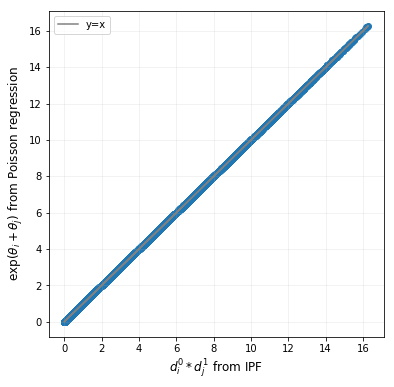

In [11]:
# check: d^0_i * d^1_j should equal exp(theta_i+theta_j)
ipf_ij = np.outer(row_factors, col_factors).flatten()
row_coefs = np.exp(result.params[:m])
col_coefs = np.exp(result.params[m:])
coefs_ij = np.outer(row_coefs, col_coefs).flatten()
assert len(ipf_ij) == len(coefs_ij)
plt.figure(figsize=(6,6))
plt.scatter(ipf_ij, coefs_ij)
plt.plot(ipf_ij, ipf_ij, color='grey', label='y=x')
plt.xlabel('$d^0_i*d^1_j$ from IPF', fontsize=12)
plt.ylabel('$\exp(\\theta_i+\\theta_j)$ from Poisson regression', fontsize=12)
plt.legend()
plt.grid(alpha=0.2)

In [12]:
mdl, result2 = run_poisson_experiment(X2, p2, q2, Y=Y2, method='irls')
result2.summary()

Constructed one-hot mat: (5000, 200)
Constructed explanatory variables: (5000, 200)
Constructed response variable: (5000,)
Initialized Poisson model [time=0.144s]
Finished fitting model with statsmodels, method irls [time=6.702s]


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 5000
Model:                            GLM   Df Residuals:                     4801
Model Family:                 Poisson   Df Model:                          198
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -6348.4
Date:                Wed, 31 Jan 2024   Deviance:                       4390.1
Time:                        11:11:50   Pearson chi2:                 4.65e+03
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.8745      0.098      8.942      0.000       0.683       1.066
x2             1.0452      0.090     11.573      0.000       0.868       1.222
x3             0.9841      0.092     10.670      0.000       0.803       1.165
x4             0.9098      0.092      9.870      0.000       0.729       1.091
x5             0.4974      0.109      4.560      0.000       0.284       0.711
x6             1.1037      0.091     12.086      0.000       0.925       1.283
x7             0.6841      0.101      6.769      0.000       0.486       0.882
x8             1.3538      0.080     16.949      0.000       1.197       1.510
x9             1.5213      0.070     21.719      0.000       1.384       1.659
x10            0.5530      0.106      5.213      0.000       0.345       0.761
x11            1.2126      0.077     15.807      0.000       1.062       1.363
x12            0.7050      0.103      6.814      0.000       0.502       0.908
x13            1.0278      0.090     11.402      0.000       0.851       1.204
x14            1.4107      0.070     20.072      0.000       1.273       1.549
x15           -1.0456      0.243     -4.296      0.000      -1.523      -0.569
x16           -0.7639      0.212     -3.597      0.000      -1.180      -0.348
x17           -2.9173      0.577     -5.054      0.000      -4.049      -1.786
x18            1.3805      0.070     19.720      0.000       1.243       1.518
x19            1.2390      0.077     16.010      0.000       1.087       1.391
x20            1.3268      0.086     15.404      0.000       1.158       1.496
x21            1.5066      0.073     20.599      0.000       1.363       1.650
x22            1.1911      0.082     14.461      0.000       1.030       1.353
x23            0.6321      0.100      6.339      0.000       0.437       0.828
x24            1.1054      0.099     11.199      0.000       0.912       1.299
x25           -0.6282      0.196     -3.210      0.001      -1.012      -0.245
x26            1.1555      0.082     14.117      0.000       0.995       1.316
x27           -0.4066      0.172     -2.360      0.018      -0.744      -0.069
x28            1.3865      0.080     17.366      0.000       1.230       1.543
x29            0.8256      0.096      8.625      0.000       0.638       1.013
x30            0.3489      0.131      2.662      0.008       0.092       0.606
x31            0.1672      0.127      1.312      0.189      -0.083       0.417
x32            1.1716      0.087     13.473      0.000       1.001       1.342
x33            0.6476      0.105      6.170      0.000       0.442       0.853
x34            0.9121      0.109      8.382      0.000       0.699       1.125
x35           -3.0120      0.693     -4.349      0.000      -4.369      -1.654
x36            1.0824      0.101     10.669      0.000       0.884       1.281
x3

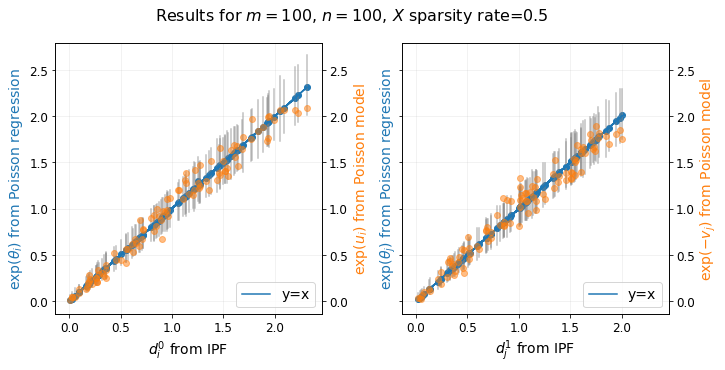

In [13]:
# plot sparsity=0.5 first to get xlim and ylim
fig, axes2 = visualize_ipf_vs_poisson_params(row_factors2, col_factors2, 
                                            result2.params, reg_cis=result2.conf_int(alpha=0.05),
                                            true_row_factors=expu, true_col_factors=expv, normalize=True)
fig.suptitle('Results for $m=100$, $n=100$, $X$ sparsity rate=0.5', fontsize=16)
plt.savefig('figs/synthetic_ipf_vs_poisson_s05.pdf', bbox_inches='tight')

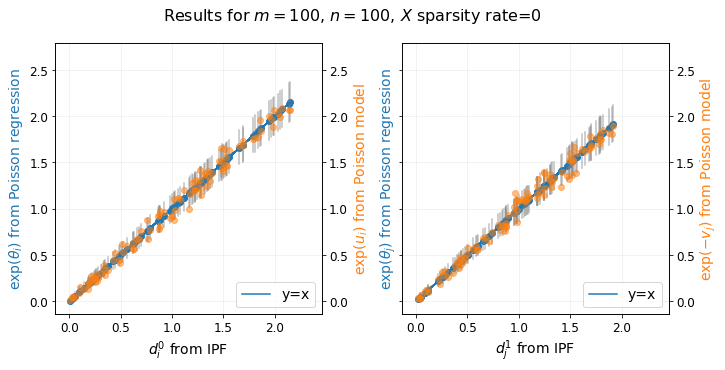

In [14]:
# use same xlim and ylim as previous plots
fig, axes = visualize_ipf_vs_poisson_params(row_factors, col_factors, 
                                            result.params, reg_cis=result.conf_int(alpha=0.05),
                                            true_row_factors=expu, true_col_factors=expv, normalize=True,
                                            xlim=axes2[0].get_xlim(), ylim=axes2[0].get_ylim())
fig.suptitle('Results for $m=100$, $n=100$, $X$ sparsity rate=0', fontsize=16)
plt.savefig('figs/synthetic_ipf_vs_poisson_s00.pdf', bbox_inches='tight')

## Evaluate IPF performance over sparsity

In [18]:
# test IPF for 1000 seeds per sparsity rate
s_range = np.round(np.arange(0, 0.91, 0.05), 2)
s2results = {}
for s in s_range:
    print(s)
    all_bounds = []
    all_iters = []
    all_l2s = []
    all_cos_sims = []
    for seed in range(1000):
        np.random.seed(seed)
        X = generate_X(dist='uniform', m=m, n=n, seed=seed, sparsity_rate=s, exact_rate=True, verbose=False)
        all_bounds.append(compute_error_bound(X, expu, expv))
        Y = generate_hourly_network(X, expu, expv, model='basic', seed=seed)
        it, l2, cossim = do_ipf_and_eval(X, Y, normalized_expu, normalized_expv)
        all_iters.append(it)
        all_l2s.append(l2)
        all_cos_sims.append(cossim)
    s2results[s] = (all_bounds, all_iters, all_l2s, all_cos_sims)
with open('./synthetic-data-sparsity-results.pkl', 'wb') as f:
    pickle.dump(s2results, f)

0.0
0.05
0.1
0.15
0.2
0.25
0.3
0.35
0.4
0.45
0.5
0.55
0.6
0.65
0.7
0.75
0.8
0.85
0.9


In [19]:
with open('./synthetic-data-sparsity-results.pkl', 'rb') as f:
    s2results = pickle.load(f)
s_range = np.round(np.arange(0, 0.91, 0.05), 2)
s_bounds = []
s_num_iters = []
s_l2s = []
s_cos_sims = []
for s in s_range:
    all_bounds, all_iters, all_l2s, all_cos_sims = s2results[s]
    s_bounds.append([np.mean(all_bounds), np.percentile(all_bounds, 2.5), np.percentile(all_bounds, 97.5)])
    s_num_iters.append([np.mean(all_iters), np.percentile(all_iters, 2.5), np.percentile(all_iters, 97.5)])
    s_l2s.append([np.mean(all_l2s), np.percentile(all_l2s, 2.5), np.percentile(all_l2s, 97.5)])    
    s_cos_sims.append([np.mean(all_cos_sims), np.percentile(all_cos_sims, 2.5), np.percentile(all_cos_sims, 97.5)])    
    print(s, np.round(s_bounds[-1], 3), np.round(s_num_iters[-1], 3), np.round(s_l2s[-1], 3), np.round(s_cos_sims[-1], 3))
s_bounds = np.array(s_bounds)
s_num_iters = np.array(s_num_iters)
s_l2s = np.array(s_l2s)
s_cos_sims = np.array(s_cos_sims)

0.0 [11.988 11.228 13.265] [13.957 13.    14.   ] [0.995 0.885 1.114] [0.911 0.907 0.914]
0.05 [13.188 12.245 14.829] [14.445 14.    15.   ] [1.025 0.911 1.138] [0.911 0.907 0.915]
0.1 [14.587 13.422 16.53 ] [15.05 15.   16.  ] [1.053 0.938 1.178] [0.911 0.907 0.915]
0.15 [16.186 14.784 18.717] [15.701 15.    16.   ] [1.084 0.958 1.208] [0.911 0.907 0.916]
0.2 [18.042 16.36  21.27 ] [16.242 16.    17.   ] [1.116 0.988 1.234] [0.912 0.907 0.916]
0.25 [20.26  18.205 24.123] [16.936 16.    18.   ] [1.157 1.031 1.299] [0.912 0.907 0.916]
0.3 [22.948 20.405 28.046] [17.643 17.    18.   ] [1.201 1.062 1.349] [0.912 0.908 0.917]
0.35 [26.188 23.087 31.748] [18.357 18.    19.   ] [1.245 1.104 1.395] [0.912 0.908 0.917]
0.4 [30.395 26.255 39.167] [19.191 18.    20.   ] [1.3   1.163 1.455] [0.913 0.908 0.918]
0.45 [35.6   30.473 46.432] [20.105 19.    21.   ] [1.365 1.213 1.534] [0.913 0.908 0.919]
0.5 [42.69  35.697 57.646] [21.195 20.    22.   ] [1.437 1.269 1.612] [0.914 0.908 0.919]
0.55 [52

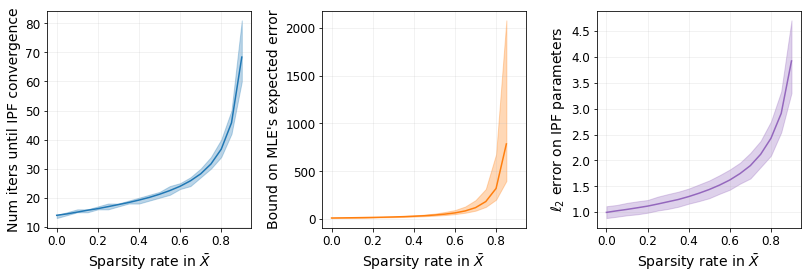

In [21]:
fig, axes = plt.subplots(1, 3, figsize=(13.5, 4), sharex=True)
fig.subplots_adjust(wspace=0.35)

ax = axes[0]
ax.plot(s_range, s_num_iters[:, 0], color='tab:blue')
ax.fill_between(s_range, s_num_iters[:, 1], s_num_iters[:, 2], color='tab:blue', alpha=0.3)
ax.set_ylabel('Num iters until IPF convergence', fontsize=14)

ax = axes[1]
ax.plot(s_range[:-1], s_bounds[:-1, 0], color='tab:orange')
ax.fill_between(s_range[:-1], s_bounds[:-1, 1], s_bounds[:-1, 2], color='tab:orange', alpha=0.3)
ax.set_ylabel('Bound on MLE\'s expected error', fontsize=14)
# ax.set_yscale('log')

ax = axes[2]
ax.plot(s_range, s_l2s[:, 0], color='tab:purple')
ax.fill_between(s_range, s_l2s[:, 1], s_l2s[:, 2], color='tab:purple', alpha=0.3)
ax.set_ylabel('$\ell_2$ error on IPF parameters', fontsize=14)

for ax in axes:
    ax.set_xlabel(r'Sparsity rate in $\bar{X}$', fontsize=14)
    ax.grid(alpha=0.2)
    ax.tick_params(labelsize=12)
plt.savefig('figs/ipf_sparsity_results.pdf', bbox_inches='tight')

## Model misspecification

### Non-Poisson

In [22]:
# no sparsity
X = generate_X(dist='uniform', m=m, n=n, seed=seed, sparsity_rate=0, verbose=True)
samples_poi = []
samples_mult = []
samples_exp = []
samples_nb = []
for seed in range(1000):
    Y_poi = generate_hourly_network(X, expu, expv, model='basic', seed=seed)
    samples_poi.append(Y_poi[X > 0])
    Y_mult = generate_hourly_network(X, expu, expv, model='mult', seed=seed)
    samples_mult.append(Y_mult[X > 0])
    Y_exp = generate_hourly_network(X, expu, expv, model='exp', seed=seed)
    samples_exp.append(Y_exp[X > 0])
    Y_nb = generate_hourly_network(X, expu, expv, model='nb', seed=seed, gamma=0.8)
    samples_nb.append(Y_nb[X > 0])
samples_poi = np.array(samples_poi)
samples_mult = np.array(samples_mult)
samples_exp = np.array(samples_exp)
samples_nb = np.array(samples_nb)

Sampling X from uniform distribution


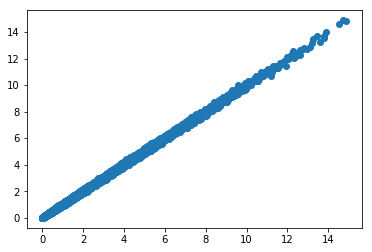

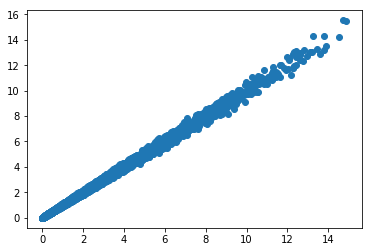

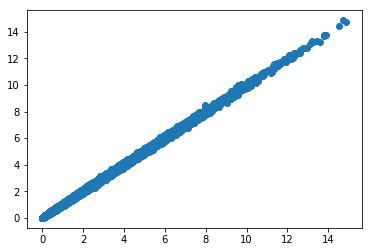

In [23]:
# check that means are approximately the same
plt.scatter(np.mean(samples_poi, axis=0), np.mean(samples_mult, axis=0))
plt.show()
plt.scatter(np.mean(samples_poi, axis=0), np.mean(samples_exp, axis=0))
plt.show()
plt.scatter(np.mean(samples_poi, axis=0), np.mean(samples_nb, axis=0))
plt.show()

In [24]:
# with sparsity rate = 0
samples_poi = []
samples_mult = []
samples_exp = []
samples_nb = []

poi_results = []
mult_results = []
exp_results = []
nb1_results = []
nb2_results = []
nb3_results = []
for seed in range(1000):
    if seed % 100 == 0: print(seed)
    X = generate_X(dist='uniform', m=m, n=n, seed=seed, sparsity_rate=0, verbose=False)
    
    Y = generate_hourly_network(X, expu, expv, model='basic', seed=seed)
    samples_poi.append(Y[X > 0])
    poi_results.append(do_ipf_and_eval(X, Y, normalized_expu, normalized_expv))
    
    Y = generate_hourly_network(X, expu, expv, model='mult', seed=seed)
    samples_mult.append(Y[X > 0])
    mult_results.append(do_ipf_and_eval(X, Y, normalized_expu, normalized_expv))
    
    Y = generate_hourly_network(X, expu, expv, model='exp', seed=seed)
    samples_exp.append(Y[X > 0])
    exp_results.append(do_ipf_and_eval(X, Y, normalized_expu, normalized_expv))
    
    Y = generate_hourly_network(X, expu, expv, model='nb', seed=seed, gamma=0.8)
    samples_nb.append(Y[X > 0])
    nb1_results.append(do_ipf_and_eval(X, Y, normalized_expu, normalized_expv))
    
    Y = generate_hourly_network(X, expu, expv, model='nb', seed=seed, gamma=0.5)
    nb2_results.append(do_ipf_and_eval(X, Y, normalized_expu, normalized_expv))
    Y = generate_hourly_network(X, expu, expv, model='nb', seed=seed, gamma=0.2)
    nb3_results.append(do_ipf_and_eval(X, Y, normalized_expu, normalized_expv))

0
100
200
300
400
500
600
700
800
900


In [25]:
# expect Poisson and multinomial results to be very similar since models are equivalent
# Poisson l2 mean should be close to 1 - that's what we observed for earlier experiment
labels = ['Poisson', 'Multinomial', 'Exponential', 'NB (gamma = 0.8)', 'NB (gamma = 0.5)', 'NB (gamma = 0.2)']
all_results = [poi_results, mult_results, exp_results, nb1_results, nb2_results, nb3_results]
for label, results in zip(labels, all_results):
    l2s = np.array(results)[:, 1]
    cossims = np.array(results)[:, 2]
    print(label, 'l2: %.3f (%.3f-%.3f), cosine sim: %.3f (%.3f-%.3f)' % (
      np.mean(l2s), np.percentile(l2s, 2.5), np.percentile(l2s, 97.5),
      np.mean(cossims), np.percentile(cossims, 2.5), np.percentile(cossims, 97.5)))

Poisson l2: 0.995 (0.885-1.114), cosine sim: 0.911 (0.907-0.914)
Multinomial l2: 0.999 (0.891-1.111), cosine sim: 0.911 (0.907-0.915)
Exponential l2: 1.734 (1.519-1.976), cosine sim: 0.855 (0.843-0.866)
NB (gamma = 0.8) l2: 1.117 (0.999-1.260), cosine sim: 0.892 (0.887-0.897)
NB (gamma = 0.5) l2: 1.410 (1.266-1.572), cosine sim: 0.843 (0.836-0.850)
NB (gamma = 0.2) l2: 2.226 (1.957-2.479), cosine sim: 0.707 (0.695-0.720)


### Interaction model

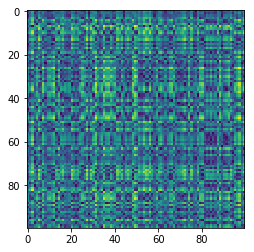

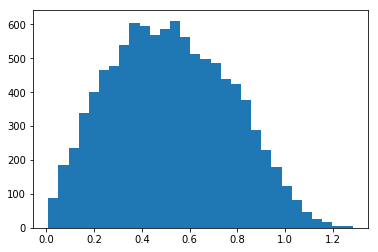

In [26]:
# generate distance matrix
D = generate_distance_mat(m, n, seed=0)
plt.imshow(D)
plt.show()
plt.hist(D.flatten(), bins=30)
plt.show()

In [27]:
beta = 0
alphas = np.arange(-0.5, 2.1, 0.1)
print(len(alphas))
iters = []
l2s = []
cossims = []
for alpha in alphas:
    s_iters = []
    s_l2s = []
    s_cossims = []
    for seed in range(1000):
        X = generate_X(dist='uniform', m=m, n=n, seed=seed, sparsity_rate=0, verbose=False)
        Y = generate_hourly_network(X, expu, expv, model='interaction', seed=seed,
                                    D=D, alpha=alpha, beta=beta)
        it, l2, cossim = do_ipf_and_eval(X, Y, normalized_expu, normalized_expv)
        s_iters.append(it)
        s_l2s.append(l2)
        s_cossims.append(cossim)
    iters.append((np.mean(s_iters), np.percentile(s_iters, 2.5), np.percentile(s_iters, 97.5)))
    l2s.append((np.mean(s_l2s), np.percentile(s_l2s, 2.5), np.percentile(s_l2s, 97.5)))
    cossims.append((np.mean(s_cossims), np.percentile(s_cossims, 2.5), np.percentile(s_cossims, 97.5)))
    print(alpha, iters[-1][0], l2s[-1][0], cossims[-1][0])
alpha_iters = np.array(iters)
alpha_l2s = np.array(l2s)
alpha_cossims = np.array(cossims)

26
-0.5 13.986 1.7236778782965965 0.8500672388821322
-0.4 13.984 1.4861911447255967 0.8768632744282655
-0.30000000000000004 13.98 1.2868118124545005 0.8940359128049249
-0.20000000000000007 13.971 1.1322581773457558 0.9042273217278409
-0.10000000000000009 13.963 1.030653994738539 0.9092255078733253
-1.1102230246251565e-16 13.957 0.9948271403563789 0.9106559952429845
0.09999999999999987 13.961 1.034272450327422 0.9095353095513471
0.19999999999999984 13.974 1.1318600961823384 0.9066308911988399
0.2999999999999998 13.97 1.2812479167869169 0.9022437189657575
0.3999999999999998 13.983 1.4718406866136002 0.8971590374737904
0.4999999999999998 13.985 1.6839206824406934 0.8912096280226312
0.5999999999999996 13.998 1.9079519126248659 0.8850101859159806
0.6999999999999997 14.009 2.1467142172784404 0.8783072306729099
0.7999999999999998 14.026 2.3836407180360655 0.871606002137898
0.8999999999999997 14.034 2.62684585130479 0.8648276786077954
0.9999999999999996 14.064 2.8810768223497507 0.857918349312

In [28]:
alpha = 0
betas = np.arange(-2, 2.1, 0.25)
print(len(betas))
iters = []
l2s = []
cossims = []
for beta in betas:
    s_iters = []
    s_l2s = []
    s_cossims = []
    for seed in range(1000):
        X = generate_X(dist='uniform', m=m, n=n, seed=seed, sparsity_rate=0, verbose=False)
        Y = generate_hourly_network(X, expu, expv, model='interaction', seed=seed,
                                    D=D, alpha=alpha, beta=beta)
        it, l2, cossim = do_ipf_and_eval(X, Y, normalized_expu, normalized_expv)
        s_iters.append(it)
        s_l2s.append(l2)
        s_cossims.append(cossim)
    iters.append((np.mean(s_iters), np.percentile(s_iters, 2.5), np.percentile(s_iters, 97.5)))
    l2s.append((np.mean(s_l2s), np.percentile(s_l2s, 2.5), np.percentile(s_l2s, 97.5)))
    cossims.append((np.mean(s_cossims), np.percentile(s_cossims, 2.5), np.percentile(s_cossims, 97.5)))
    print(beta, iters[-1][0], l2s[-1][0], cossims[-1][0])
beta_iters = np.array(iters)
beta_l2s = np.array(l2s)
beta_cossims = np.array(cossims)

17
-2.0 14.153 3.4707002887318414 0.8553426546435954
-1.75 14.093 3.0337884513595665 0.8667188938016187
-1.5 14.049 2.6170917522908272 0.8774653179770685
-1.25 14.013 2.2107993695536434 0.8870551766988035
-1.0 14.002 1.8409885423801948 0.8951694230881508
-0.75 13.977 1.509860356567061 0.9018539497144904
-0.5 13.964 1.23885192537724 0.906693638664171
-0.25 13.969 1.0595073837878193 0.9097046367747194
0.0 13.957 0.9948271403563789 0.9106559952429845
0.25 13.968 1.0546868833733811 0.9096012530290171
0.5 13.969 1.2001774191828003 0.906457863212876
0.75 13.98 1.3976689798562998 0.9014147276040863
1.0 13.983 1.6089261821675163 0.8943534854178303
1.25 13.984 1.8360622458670262 0.8856638604269864
1.5 13.995 2.05198023451904 0.8755654554680858
1.75 14.016 2.259597827769888 0.8638096794220435
2.0 14.015 2.4590756468694135 0.8512198274675393


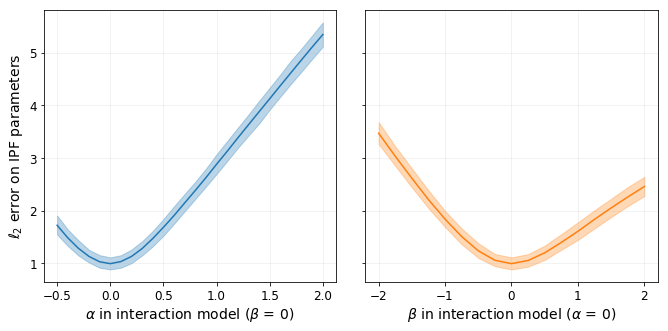

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(11, 5), sharex=False, sharey=True)
fig.subplots_adjust(wspace=0.1)
ax = axes[0]
ax.plot(alphas, alpha_l2s[:, 0])
ax.fill_between(alphas, alpha_l2s[:, 1], alpha_l2s[:, 2], color='tab:blue', alpha=0.3)
ax.set_xlabel(r'$\alpha$ in interaction model ($\beta$ = 0)', fontsize=14)
ax.set_ylabel('$\ell_2$ error on IPF parameters', fontsize=14)
ax.grid(alpha=0.2)
ax.tick_params(labelsize=12)

ax = axes[1]
ax.plot(betas, beta_l2s[:, 0], color='tab:orange')
ax.fill_between(betas, beta_l2s[:, 1], beta_l2s[:, 2], color='tab:orange', alpha=0.3)
ax.set_xlabel(r'$\beta$ in interaction model ($\alpha$ = 0)', fontsize=14)
ax.grid(alpha=0.2)
ax.tick_params(labelsize=12)
plt.savefig('figs/interaction-model-l2.pdf', bbox_inches='tight')

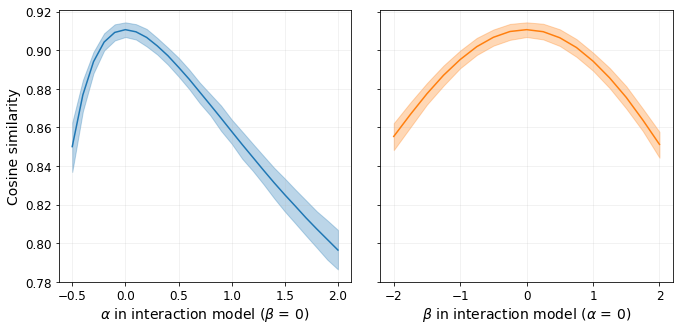

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(11, 5), sharex=False, sharey=True)
fig.subplots_adjust(wspace=0.1)

ax = axes[0]
ax.plot(alphas, alpha_cossims[:, 0])
ax.fill_between(alphas, alpha_cossims[:, 1], alpha_cossims[:, 2], color='tab:blue', alpha=0.3)
ax.set_xlabel(r'$\alpha$ in interaction model ($\beta$ = 0)', fontsize=14)
ax.set_ylabel('Cosine similarity', fontsize=14)
ax.grid(alpha=0.2)
ax.tick_params(labelsize=12)

ax = axes[1]
ax.plot(betas, beta_cossims[:, 0], color='tab:orange')
ax.fill_between(betas, beta_cossims[:, 1], beta_cossims[:, 2], color='tab:orange', alpha=0.3)
ax.set_xlabel(r'$\beta$ in interaction model ($\alpha$ = 0)', fontsize=14)
ax.grid(alpha=0.2)
ax.tick_params(labelsize=12)
plt.savefig('figs/interaction-model-cosine.pdf', bbox_inches='tight')

# SafeGraph mobility data

In [34]:
# load data for March 2, 2020
msa_name = 'Richmond_VA'
dt = datetime.datetime(2020, 3, 2)
msa_df_date_range = '20200302_20200608'

min_datetime = datetime.datetime(dt.year, dt.month, dt.day, 0)
max_datetime = datetime.datetime(dt.year, dt.month, dt.day, 23)
CBG_COUNT_CUTOFF = 100  # this doesn't matter since CBGs are prespecified
POI_HOURLY_VISITS_CUTOFF = 'all'  # same, doesn't matter
poi_ids = helper.load_poi_ids_for_msa(msa_name)
cbg_ids = helper.load_cbg_ids_for_msa(msa_name)
print('Loaded %d POI and %d CBG ids' % (len(poi_ids), len(cbg_ids)))
msa_df = helper.prep_msa_df_for_model_experiments(msa_name, [msa_df_date_range])
m1 = fit_disease_model_on_real_data(d=msa_df,
                                   min_datetime=min_datetime,
                                   max_datetime=max_datetime,
                                   msa_name=msa_name,
                                   exogenous_model_kwargs={'poi_psi':1, 
                                                           'home_beta':1, 
                                                           'p_sick_at_t0':0,  # don't need infections
                                                           'just_compute_r0':False},
                                   poi_attributes_to_clip={'clip_areas':True, 
                                                           'clip_dwell_times':True, 
                                                           'clip_visits':True},
                                   preload_poi_visits_list_filename=None,
                                   poi_cbg_visits_list=None,
                                   poi_ids=poi_ids,
                                   cbg_ids=cbg_ids,
                                   correct_poi_visits=True,
                                   multiply_poi_visit_counts_by_census_ratio=True,
                                   aggregate_home_cbg_col='aggregated_cbg_population_adjusted_visitor_home_cbgs',
                                   poi_hourly_visits_cutoff=POI_HOURLY_VISITS_CUTOFF,  
                                   cbg_count_cutoff=CBG_COUNT_CUTOFF,
                                   cbgs_to_filter_for=None,
                                   cbg_groups_to_track=None,
                                   counties_to_track=None,
                                   include_cbg_prop_out=True,
                                   include_inter_cbg_travel=False,
                                   include_mask_use=False,
                                   model_init_kwargs={'ipf_final_match':'poi',
                                                      'ipf_num_iter':100,
                                                      'num_seeds':2},
                                   simulation_kwargs={'do_ipf':True, 
                                                      'allow_early_stopping':False},
                                   counterfactual_poi_opening_experiment_kwargs=None,
                                   counterfactual_retrospective_experiment_kwargs=None,
                                   return_model_without_fitting=True,  # note: changed from False to True
                                   attach_data_to_model=True,
                                   model_quality_dict=None,
                                   verbose=True)

Loaded 9917 POI and 1098 CBG ids
Loaded 16269 rows for Richmond_VA in 3.398 seconds
Loaded 15546 rows for Richmond_VA in 6.307 seconds
1. Processing SafeGraph data...
Found 24 hours in all (2020.3.2.0 to 2020.3.2.23)
Clipping areas: True (below=5, above=95), clipping dwell times: True (above=90), clipping visits: True (above=95)
Found 121 sub-categories with >= 20 POIs and 43 top categories with >= 20 POIs -> covers 15870 POIs
Could not cover 399/16269 POIs (2.5% POIs) -> dropping these POIs
Accounting, Tax Preparation, Bookkeeping, and Payroll Services -> has 87 POIs, processed 7 POIs, 7 visits before clipping, 7 visits after clipping
Activities Related to Credit Intermediation -> has 28 POIs, processed 28 POIs, 36 visits before clipping, 36 visits after clipping
Automotive Equipment Rental and Leasing -> has 72 POIs, processed 16 POIs, 20 visits before clipping, 20 visits after clipping
Automotive Parts, Accessories, and Tire Stores -> has 319 POIs, processed 10 POIs, 42 visits befor

Full-Service Restaurants -> has 1340 POIs, processed 1340 POIs, 10061 visits before clipping, 9177 visits after clipping
Funeral Homes and Funeral Services -> has 27 POIs, processed 27 POIs, 13 visits before clipping, 13 visits after clipping
Furniture Stores -> has 117 POIs, processed 117 POIs, 465 visits before clipping, 434 visits after clipping
Gasoline Stations with Convenience Stores -> has 416 POIs, processed 416 POIs, 3534 visits before clipping, 3206 visits after clipping
General Automotive Repair -> has 363 POIs, processed 363 POIs, 708 visits before clipping, 668 visits after clipping
General Medical and Surgical Hospitals -> has 21 POIs, processed 21 POIs, 200 visits before clipping, 189 visits after clipping
General Warehousing and Storage -> has 23 POIs, processed 23 POIs, 12 visits before clipping, 12 visits after clipping
Gift, Novelty, and Souvenir Stores -> has 55 POIs, processed 55 POIs, 339 visits before clipping, 325 visits after clipping
Golf Courses and Country C

After clipping, 15870 POIs
Received 9917 pre-specified POI ids -> missing 0 in dataframe
13608 / 238008 hours are null -> filling with 0
220333 rows of 2018 1-year ACS data read
217739 rows of 2017 5-year ACS data read
Received 1098 pre-specified CBG ids
FINAL: number of CBGs (N) = 1098, number of POIs (M) = 9917
Num connected POI-CBG pairs (E) = 876673, network density (E/N) = 798.427
Dwell time correction factors: mean = 0.16, min = 0.01, max = 0.80
Correcting POI hourly visit vectors...
After correcting, 147652.89 hourly visits
Removing 0.617% of people from SafeGraph count who are not in 50 states or DC
Total US population from ACS: 322903030; total safegraph visitor count: 46554310; correction factor for POI visits is 6.936
2. Processing ACS data...
CBGs: median population size = 1590, sum of population sizes = 2048200
Attribute p_black: was able to compute for 100.0% out of 1098 CBGs, median is 0.204
Attribute p_white: was able to compute for 100.0% out of 1098 CBGs, median is 0.

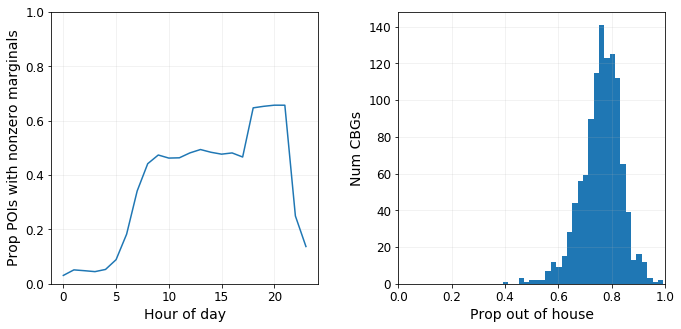

In [36]:
# plot marginals
fig, axes = plt.subplots(1, 2, figsize=(11, 5))
fig.subplots_adjust(wspace=0.3)
ax = axes[0]
nonzero = m1.POI_TIME_COUNTS > 0
ax.plot(np.mean(nonzero, axis=0))
ax.set_xlabel('Hour of day', fontsize=14)
ax.set_ylabel('Prop POIs with nonzero marginals', fontsize=14)
ax.set_ylim(0, 1)

ax = axes[1]
ax.hist(m1.cbg_day_prop_out.flatten(), bins=30)
ax.set_xlabel('Prop out of house', fontsize=14)
ax.set_ylabel('Num CBGs', fontsize=14)
ax.set_xlim(0, 1)

for ax in axes:
    ax.tick_params(labelsize=12)
    ax.grid(alpha=0.2)
plt.savefig('figs/richmond_marginals_20200302.pdf', bbox_inches='tight')

In [37]:
# load data for April 6, 2020
msa_name = 'Richmond_VA'
dt = datetime.datetime(2020, 4, 6)
msa_df_date_range = '20200302_20200608'

min_datetime = datetime.datetime(dt.year, dt.month, dt.day, 0)
max_datetime = datetime.datetime(dt.year, dt.month, dt.day, 23)
CBG_COUNT_CUTOFF = 100  # this doesn't matter since CBGs are prespecified
POI_HOURLY_VISITS_CUTOFF = 'all'  # same, doesn't matter
poi_ids = helper.load_poi_ids_for_msa(msa_name)
cbg_ids = helper.load_cbg_ids_for_msa(msa_name)
print('Loaded %d POI and %d CBG ids' % (len(poi_ids), len(cbg_ids)))
msa_df = helper.prep_msa_df_for_model_experiments(msa_name, [msa_df_date_range])
m2 = fit_disease_model_on_real_data(d=msa_df,
                                   min_datetime=min_datetime,
                                   max_datetime=max_datetime,
                                   msa_name=msa_name,
                                   exogenous_model_kwargs={'poi_psi':1, 
                                                           'home_beta':1, 
                                                           'p_sick_at_t0':0,  # don't need infections
                                                           'just_compute_r0':False},
                                   poi_attributes_to_clip={'clip_areas':True, 
                                                           'clip_dwell_times':True, 
                                                           'clip_visits':True},
                                   preload_poi_visits_list_filename=None,
                                   poi_cbg_visits_list=None,
                                   poi_ids=poi_ids,
                                   cbg_ids=cbg_ids,
                                   correct_poi_visits=True,
                                   multiply_poi_visit_counts_by_census_ratio=True,
                                   aggregate_home_cbg_col='aggregated_cbg_population_adjusted_visitor_home_cbgs',
                                   poi_hourly_visits_cutoff=POI_HOURLY_VISITS_CUTOFF,  
                                   cbg_count_cutoff=CBG_COUNT_CUTOFF,
                                   cbgs_to_filter_for=None,
                                   cbg_groups_to_track=None,
                                   counties_to_track=None,
                                   include_cbg_prop_out=True,
                                   include_inter_cbg_travel=False,
                                   include_mask_use=False,
                                   model_init_kwargs={'ipf_final_match':'poi',
                                                      'ipf_num_iter':100,
                                                      'num_seeds':2},
                                   simulation_kwargs={'do_ipf':True, 
                                                      'allow_early_stopping':False},
                                   counterfactual_poi_opening_experiment_kwargs=None,
                                   counterfactual_retrospective_experiment_kwargs=None,
                                   return_model_without_fitting=True,  # note: changed from False to True
                                   attach_data_to_model=True,
                                   model_quality_dict=None,
                                   verbose=True)

Loaded 9917 POI and 1098 CBG ids
Loaded 16269 rows for Richmond_VA in 2.857 seconds
Loaded 15546 rows for Richmond_VA in 5.664 seconds
1. Processing SafeGraph data...
Found 24 hours in all (2020.4.6.0 to 2020.4.6.23)
Clipping areas: True (below=5, above=95), clipping dwell times: True (above=90), clipping visits: True (above=95)
Found 121 sub-categories with >= 20 POIs and 43 top categories with >= 20 POIs -> covers 15870 POIs
Could not cover 399/16269 POIs (2.5% POIs) -> dropping these POIs
Accounting, Tax Preparation, Bookkeeping, and Payroll Services -> has 87 POIs, processed 7 POIs, 6 visits before clipping, 6 visits after clipping
Activities Related to Credit Intermediation -> has 28 POIs, processed 28 POIs, 13 visits before clipping, 13 visits after clipping
Automotive Equipment Rental and Leasing -> has 72 POIs, processed 16 POIs, 22 visits before clipping, 22 visits after clipping
Automotive Parts, Accessories, and Tire Stores -> has 319 POIs, processed 10 POIs, 36 visits befor

Fruit and Vegetable Markets -> has 31 POIs, processed 31 POIs, 53 visits before clipping, 52 visits after clipping
Full-Service Restaurants -> has 1340 POIs, processed 1340 POIs, 3254 visits before clipping, 3132 visits after clipping
Funeral Homes and Funeral Services -> has 27 POIs, processed 27 POIs, 20 visits before clipping, 20 visits after clipping
Furniture Stores -> has 117 POIs, processed 117 POIs, 209 visits before clipping, 200 visits after clipping
Gasoline Stations with Convenience Stores -> has 416 POIs, processed 416 POIs, 2503 visits before clipping, 2305 visits after clipping
General Automotive Repair -> has 363 POIs, processed 363 POIs, 434 visits before clipping, 429 visits after clipping
General Medical and Surgical Hospitals -> has 21 POIs, processed 21 POIs, 93 visits before clipping, 89 visits after clipping
General Warehousing and Storage -> has 23 POIs, processed 23 POIs, 9 visits before clipping, 9 visits after clipping
Gift, Novelty, and Souvenir Stores -> ha

After clipping, 15870 POIs
Received 9917 pre-specified POI ids -> missing 0 in dataframe
21312 / 238008 hours are null -> filling with 0
220333 rows of 2018 1-year ACS data read
217739 rows of 2017 5-year ACS data read
Received 1098 pre-specified CBG ids
FINAL: number of CBGs (N) = 1098, number of POIs (M) = 9917
Num connected POI-CBG pairs (E) = 876673, network density (E/N) = 798.427
Dwell time correction factors: mean = 0.16, min = 0.01, max = 0.80
Correcting POI hourly visit vectors...
After correcting, 57683.66 hourly visits
Removing 0.617% of people from SafeGraph count who are not in 50 states or DC
Total US population from ACS: 322903030; total safegraph visitor count: 46554310; correction factor for POI visits is 6.936
2. Processing ACS data...
CBGs: median population size = 1590, sum of population sizes = 2048200
Attribute p_black: was able to compute for 100.0% out of 1098 CBGs, median is 0.204
Attribute p_white: was able to compute for 100.0% out of 1098 CBGs, median is 0.6

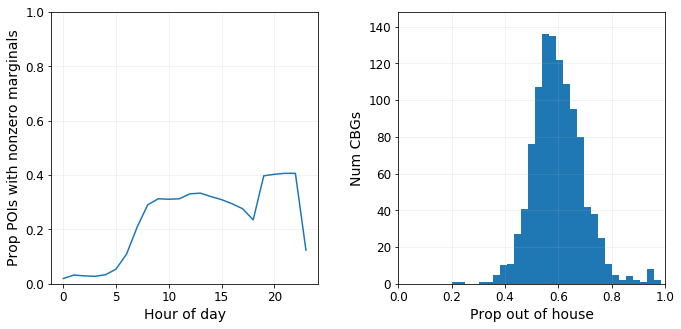

In [38]:
# plot marginals
fig, axes2 = plt.subplots(1, 2, figsize=(11, 5))
fig.subplots_adjust(wspace=0.3)
ax = axes2[0]
nonzero = m2.POI_TIME_COUNTS > 0
ax.plot(np.mean(nonzero, axis=0))
ax.set_xlabel('Hour of day', fontsize=14)
ax.set_ylabel('Prop POIs with nonzero marginals', fontsize=14)
ax.set_ylim(0, 1)

ax = axes2[1]
ax.hist(m2.cbg_day_prop_out.flatten(), bins=30)
ax.set_xlabel('Prop out of house', fontsize=14)
ax.set_ylabel('Num CBGs', fontsize=14)
ax.set_xlim(0, 1)
ax.set_ylim(axes[1].get_ylim())

for ax in axes2:
    ax.tick_params(labelsize=12)
    ax.grid(alpha=0.2)
plt.savefig('figs/richmond_marginals_20200406.pdf', bbox_inches='tight')

<>:14: DeprecationWarning: invalid escape sequence \e
<>:14: DeprecationWarning: invalid escape sequence \e
<>:14: DeprecationWarning: invalid escape sequence \e
<ipython-input-39-260468ed5d9f>:14: DeprecationWarning: invalid escape sequence \e
  ax.set_ylabel('$\ell_1$ error on marginals $p$ and $q$', fontsize=14)


0 141
4 102
8 182
12 178
16 159
20 112
0 39
4 31
8 88
12 96
16 102
20 97


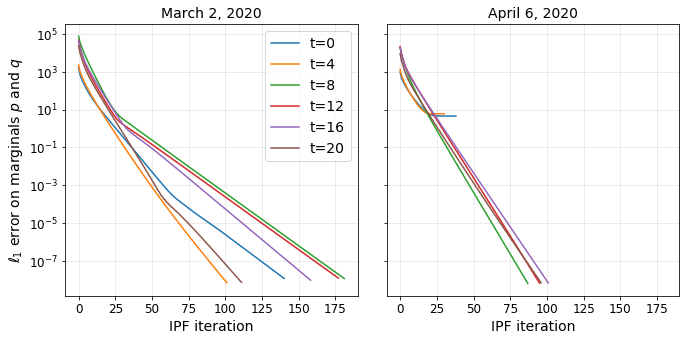

In [39]:
# plot l1 error on target marginals over iterations
fig, axes = plt.subplots(1, 2, figsize=(11, 5), sharex=True, sharey=True)
fig.subplots_adjust(wspace=0.1)
# fig.suptitle('$\ell_1$ error on marginals over IPF iterations', fontsize=16)
ax = axes[0]
for t in np.arange(0, 24, 4):
    fn = 'ipf-output/Richmond_VA_2020-03-02-%s.pkl' % str(t).zfill(2)  # pad with zeros if necessary
    with open(fn, 'rb') as f:
        i, row_factors, col_factors, row_errs, col_errs = pickle.load(f)
    l1_err = np.array(row_errs) + np.array(col_errs)
    ax.plot(l1_err, label=f't={t}')
    print(t, len(row_errs))
ax.legend(fontsize=14)
ax.set_ylabel('$\ell_1$ error on marginals $p$ and $q$', fontsize=14)
ax.set_title('March 2, 2020', fontsize=14)
    
ax = axes[1]
for t in np.arange(0, 24, 4):
    fn = 'ipf-output/Richmond_VA_2020-04-06-%s.pkl' % str(t).zfill(2)  # pad with zeros if necessary
    with open(fn, 'rb') as f:
        i, row_factors, col_factors, row_errs, col_errs = pickle.load(f)
    l1_err = np.array(row_errs) + np.array(col_errs)
    ax.plot(l1_err, label=f't={t}')
    print(t, len(row_errs))
ax.set_title('April 6, 2020', fontsize=14)
    
for ax in axes:
    ax.set_yscale('log')
    ax.grid(alpha=0.3)
    ax.set_xlabel('IPF iteration', fontsize=14)
    ax.tick_params(labelsize=12)

plt.savefig('figs/richmond_ipf_convergence.pdf', bbox_inches='tight')

## Test ConvIPF

### On toy example

In [40]:
# violation: 3 rows can't fit into 2 columns; connected graph
X = np.array([[1, 0, 0],
              [1, 1, 0],
              [0, 1, 0],
              [0, 1, 1]])
p = np.array([1, 1, 1, 1])
q = np.array([1, 1, 2])

G, f_val, F = test_ipf_convergence_from_max_flow(X, p, q, return_flow_mat=True)

Constructed graph for max flow
Finished computing max flow [time=0.00s]
Flow value = 3.000, marginal total = 4.000 -> equal = False


In [41]:
test_ipf_convergence_from_row_subsets(X, p, q, max_set_size=5, return_early=False)

Found 4 sets of size 1
Finished checks for this set size [time = 0.001s]

Found 6 sets of size 2
Finished checks for this set size [time = 0.001s]

Found 4 sets of size 3
Finished checks for this set size [time = 0.001s]
Found 1 violations
Rows: [0 1 2] -> row total = 3.0000, col total = 2.0000

Found 1 sets of size 4
Finished checks for this set size [time = 0.003s]



In [42]:
out = compare_convergence_algorithms(X, p, q)

Objective: minimize number of edges, using row with largest p_i
=== ITER 0 ==
Constructed graph for max flow
Finished computing max flow [time=0.00s]
Flow value = 3.000, marginal total = 4.000 -> equal = False
Found 1 rows below capacity
Found blocking set of size 3
Total row marginal = 3.000, total column marginal = 2.000
Num column options 1
Row with largest p_i: 0
Added top-1 columns: [2]

=== ITER 1 ==
Constructed graph for max flow
Finished computing max flow [time=0.00s]
Flow value = 4.000, marginal total = 4.000 -> equal = True
Finished convergence algorithm [total time=0.010s]

Objective: minimize number of edges, using row with smallest p_i
=== ITER 0 ==
Constructed graph for max flow
Finished computing max flow [time=0.00s]
Flow value = 3.000, marginal total = 4.000 -> equal = False
Found 1 rows below capacity
Found blocking set of size 3
Total row marginal = 3.000, total column marginal = 2.000
Num column options 1
Row with smallest p_i: 0
Added top-1 columns: [2]

=== ITER 

### On SafeGraph data

In [43]:
# 2AM on March 2
msa_name = 'Richmond_VA'
dt = datetime.datetime(2020, 3, 2, 2)
msa_df_date_range = '20200302_20200608'    
X, p, q = prep_safegraph_data_for_ipf(msa_name, dt, msa_df_date_range)
print('Date: %s, marginals prop positive -> POIs = %.3f, CBGs = %.3f' % (
    dt.strftime('%Y-%m-%d-%H'), np.mean(p > 0), np.mean(q > 0)))

Loaded 9917 POI and 1098 CBG ids
Loaded 16269 rows for Richmond_VA in 3.077 seconds
Loaded 15546 rows for Richmond_VA in 5.577 seconds
1. Processing SafeGraph data...
Found 24 hours in all (2020.3.2.0 to 2020.3.2.23)
Clipping areas: True (below=5, above=95), clipping dwell times: True (above=90), clipping visits: True (above=95)
Found 121 sub-categories with >= 20 POIs and 43 top categories with >= 20 POIs -> covers 15870 POIs
Could not cover 399/16269 POIs (2.5% POIs) -> dropping these POIs
Accounting, Tax Preparation, Bookkeeping, and Payroll Services -> has 87 POIs, processed 7 POIs, 7 visits before clipping, 7 visits after clipping
Activities Related to Credit Intermediation -> has 28 POIs, processed 28 POIs, 36 visits before clipping, 36 visits after clipping
Automotive Equipment Rental and Leasing -> has 72 POIs, processed 16 POIs, 20 visits before clipping, 20 visits after clipping
Automotive Parts, Accessories, and Tire Stores -> has 319 POIs, processed 10 POIs, 42 visits befor

Fitness and Recreational Sports Centers -> has 330 POIs, processed 330 POIs, 4250 visits before clipping, 3869 visits after clipping
Floor Covering Stores -> has 23 POIs, processed 23 POIs, 92 visits before clipping, 91 visits after clipping
Florists -> has 62 POIs, processed 62 POIs, 451 visits before clipping, 410 visits after clipping
Food (Health) Supplement Stores -> has 34 POIs, processed 34 POIs, 128 visits before clipping, 125 visits after clipping
Fruit and Vegetable Markets -> has 31 POIs, processed 31 POIs, 79 visits before clipping, 77 visits after clipping
Full-Service Restaurants -> has 1340 POIs, processed 1340 POIs, 10061 visits before clipping, 9177 visits after clipping
Funeral Homes and Funeral Services -> has 27 POIs, processed 27 POIs, 13 visits before clipping, 13 visits after clipping
Furniture Stores -> has 117 POIs, processed 117 POIs, 465 visits before clipping, 434 visits after clipping
Gasoline Stations with Convenience Stores -> has 416 POIs, processed 416 

After clipping, 15870 POIs
Received 9917 pre-specified POI ids -> missing 0 in dataframe
13608 / 238008 hours are null -> filling with 0
220333 rows of 2018 1-year ACS data read
217739 rows of 2017 5-year ACS data read
Received 1098 pre-specified CBG ids
FINAL: number of CBGs (N) = 1098, number of POIs (M) = 9917
Num connected POI-CBG pairs (E) = 876673, network density (E/N) = 798.427
Dwell time correction factors: mean = 0.16, min = 0.01, max = 0.80
Correcting POI hourly visit vectors...
After correcting, 147652.89 hourly visits
Removing 0.617% of people from SafeGraph count who are not in 50 states or DC
Total US population from ACS: 322903030; total safegraph visitor count: 46554310; correction factor for POI visits is 6.936
2. Processing ACS data...
CBGs: median population size = 1590, sum of population sizes = 2048200
Attribute p_black: was able to compute for 100.0% out of 1098 CBGs, median is 0.204
Attribute p_white: was able to compute for 100.0% out of 1098 CBGs, median is 0.

In [44]:
out = compare_convergence_algorithms(X, p, q)
with open('convergence_results_%s.pkl' % dt.strftime('%Y-%m-%d-%H'), 'wb') as f:
    pickle.dump(out, f)

Objective: minimize number of edges, using row with largest p_i
=== ITER 0 ==
Constructed graph for max flow
Finished computing max flow [time=14.91s]
Flow value = 2674.601, marginal total = 2676.674 -> equal = False
Found 24 rows below capacity
Found blocking set of size 476
Total row marginal = 2669.885, total column marginal = 2669.427
Num column options 2
Row with largest p_i: 1297
Added top-1 columns: [720]

=== ITER 1 ==
Constructed graph for max flow
Finished computing max flow [time=14.07s]
Flow value = 2674.601, marginal total = 2676.674 -> equal = False
Found 38 rows below capacity
Found blocking set of size 477
Total row marginal = 2675.931, total column marginal = 2673.859
Num column options 1
Row with largest p_i: 1297
Added top-1 columns: [826]

=== ITER 2 ==
Constructed graph for max flow
Finished computing max flow [time=13.18s]
Flow value = 2676.674, marginal total = 2676.674 -> equal = True
Finished convergence algorithm [total time=48.207s]

Objective: minimize numbe

Selected columns: [720]

=== ITER 3 ==
Constructed graph for max flow
Finished computing max flow [time=15.32s]
Flow value = 2674.601, marginal total = 2676.674 -> equal = False
Found 35 rows below capacity
Found blocking set of size 474
Total row marginal = 2675.299, total column marginal = 2673.859
Found eigenvalues and eigenvectors [time=22.830]
Row with smallest left eigenvector: 4888
Finished solving ILP [time=0.17s]
Selected columns: [826]

=== ITER 4 ==
Constructed graph for max flow
Finished computing max flow [time=15.23s]
Flow value = 2676.634, marginal total = 2676.674 -> equal = False
Found 29 rows below capacity
Found blocking set of size 476
Total row marginal = 2673.899, total column marginal = 2673.859
Found eigenvalues and eigenvectors [time=21.318]
Row with smallest left eigenvector: 4062
Finished solving ILP [time=0.18s]
Selected columns: [826]

=== ITER 5 ==
Constructed graph for max flow
Finished computing max flow [time=16.17s]
Flow value = 2676.674, marginal tota

In [45]:
# 12AM on April 6
msa_name = 'Richmond_VA'
dt = datetime.datetime(2020, 4, 6, 0)
msa_df_date_range = '20200302_20200608'    
X, p, q = prep_safegraph_data_for_ipf(msa_name, dt, msa_df_date_range)
print('Date: %s, marginals prop positive -> POIs = %.3f, CBGs = %.3f' % (
    dt.strftime('%Y-%m-%d-%H'), np.mean(p > 0), np.mean(q > 0)))

Loaded 9917 POI and 1098 CBG ids
Loaded 16269 rows for Richmond_VA in 2.963 seconds
Loaded 15546 rows for Richmond_VA in 6.184 seconds
1. Processing SafeGraph data...
Found 24 hours in all (2020.4.6.0 to 2020.4.6.23)
Clipping areas: True (below=5, above=95), clipping dwell times: True (above=90), clipping visits: True (above=95)
Found 121 sub-categories with >= 20 POIs and 43 top categories with >= 20 POIs -> covers 15870 POIs
Could not cover 399/16269 POIs (2.5% POIs) -> dropping these POIs
Accounting, Tax Preparation, Bookkeeping, and Payroll Services -> has 87 POIs, processed 7 POIs, 6 visits before clipping, 6 visits after clipping
Activities Related to Credit Intermediation -> has 28 POIs, processed 28 POIs, 13 visits before clipping, 13 visits after clipping
Automotive Equipment Rental and Leasing -> has 72 POIs, processed 16 POIs, 22 visits before clipping, 22 visits after clipping
Automotive Parts, Accessories, and Tire Stores -> has 319 POIs, processed 10 POIs, 36 visits befor

Fitness and Recreational Sports Centers -> has 330 POIs, processed 330 POIs, 1008 visits before clipping, 974 visits after clipping
Floor Covering Stores -> has 23 POIs, processed 23 POIs, 56 visits before clipping, 54 visits after clipping
Florists -> has 62 POIs, processed 62 POIs, 220 visits before clipping, 208 visits after clipping
Food (Health) Supplement Stores -> has 34 POIs, processed 34 POIs, 60 visits before clipping, 59 visits after clipping
Fruit and Vegetable Markets -> has 31 POIs, processed 31 POIs, 53 visits before clipping, 52 visits after clipping
Full-Service Restaurants -> has 1340 POIs, processed 1340 POIs, 3254 visits before clipping, 3132 visits after clipping
Funeral Homes and Funeral Services -> has 27 POIs, processed 27 POIs, 20 visits before clipping, 20 visits after clipping
Furniture Stores -> has 117 POIs, processed 117 POIs, 209 visits before clipping, 200 visits after clipping
Gasoline Stations with Convenience Stores -> has 416 POIs, processed 416 POIs

After clipping, 15870 POIs
Received 9917 pre-specified POI ids -> missing 0 in dataframe
21312 / 238008 hours are null -> filling with 0
220333 rows of 2018 1-year ACS data read
217739 rows of 2017 5-year ACS data read
Received 1098 pre-specified CBG ids
FINAL: number of CBGs (N) = 1098, number of POIs (M) = 9917
Num connected POI-CBG pairs (E) = 876673, network density (E/N) = 798.427
Dwell time correction factors: mean = 0.16, min = 0.01, max = 0.80
Correcting POI hourly visit vectors...
After correcting, 57683.66 hourly visits
Removing 0.617% of people from SafeGraph count who are not in 50 states or DC
Total US population from ACS: 322903030; total safegraph visitor count: 46554310; correction factor for POI visits is 6.936
2. Processing ACS data...
CBGs: median population size = 1590, sum of population sizes = 2048200
Attribute p_black: was able to compute for 100.0% out of 1098 CBGs, median is 0.204
Attribute p_white: was able to compute for 100.0% out of 1098 CBGs, median is 0.6

In [46]:
out = compare_convergence_algorithms(X, p, q)
with open('convergence_results_%s.pkl' % dt.strftime('%Y-%m-%d-%H'), 'wb') as f:
    pickle.dump(out, f)

Objective: minimize number of edges, using row with largest p_i
=== ITER 0 ==
Constructed graph for max flow
Finished computing max flow [time=13.90s]
Flow value = 1210.633, marginal total = 1212.926 -> equal = False
Found 19 rows below capacity
Found blocking set of size 192
Total row marginal = 1212.926, total column marginal = 1210.633
Num column options 2
Row with largest p_i: 1543
Added top-2 columns: [720, 688]

=== ITER 1 ==
Constructed graph for max flow
Finished computing max flow [time=15.09s]
Flow value = 1212.926, marginal total = 1212.926 -> equal = True
Finished convergence algorithm [total time=32.737s]

Objective: minimize number of edges, using row with smallest p_i
=== ITER 0 ==
Constructed graph for max flow
Finished computing max flow [time=13.60s]
Flow value = 1210.633, marginal total = 1212.926 -> equal = False
Found 19 rows below capacity
Found blocking set of size 192
Total row marginal = 1212.926, total column marginal = 1210.633
Num column options 2
Row with s

In [47]:
# 4AM on April 6
msa_name = 'Richmond_VA'
dt = datetime.datetime(2020, 4, 6, 4)
msa_df_date_range = '20200302_20200608'    
X, p, q = prep_safegraph_data_for_ipf(msa_name, dt, msa_df_date_range)
print('Date: %s, marginals prop positive -> POIs = %.3f, CBGs = %.3f' % (
    dt.strftime('%Y-%m-%d-%H'), np.mean(p > 0), np.mean(q > 0)))

Loaded 9917 POI and 1098 CBG ids
Loaded 16269 rows for Richmond_VA in 2.969 seconds
Loaded 15546 rows for Richmond_VA in 5.497 seconds
1. Processing SafeGraph data...
Found 24 hours in all (2020.4.6.0 to 2020.4.6.23)
Clipping areas: True (below=5, above=95), clipping dwell times: True (above=90), clipping visits: True (above=95)
Found 121 sub-categories with >= 20 POIs and 43 top categories with >= 20 POIs -> covers 15870 POIs
Could not cover 399/16269 POIs (2.5% POIs) -> dropping these POIs
Accounting, Tax Preparation, Bookkeeping, and Payroll Services -> has 87 POIs, processed 7 POIs, 6 visits before clipping, 6 visits after clipping
Activities Related to Credit Intermediation -> has 28 POIs, processed 28 POIs, 13 visits before clipping, 13 visits after clipping
Automotive Equipment Rental and Leasing -> has 72 POIs, processed 16 POIs, 22 visits before clipping, 22 visits after clipping
Automotive Parts, Accessories, and Tire Stores -> has 319 POIs, processed 10 POIs, 36 visits befor

Family Clothing Stores -> has 46 POIs, processed 46 POIs, 87 visits before clipping, 83 visits after clipping
Fire Protection -> has 94 POIs, processed 94 POIs, 177 visits before clipping, 174 visits after clipping
Fish and Seafood Markets -> has 27 POIs, processed 27 POIs, 105 visits before clipping, 103 visits after clipping
Fitness and Recreational Sports Centers -> has 330 POIs, processed 330 POIs, 1008 visits before clipping, 974 visits after clipping
Floor Covering Stores -> has 23 POIs, processed 23 POIs, 56 visits before clipping, 54 visits after clipping
Florists -> has 62 POIs, processed 62 POIs, 220 visits before clipping, 208 visits after clipping
Food (Health) Supplement Stores -> has 34 POIs, processed 34 POIs, 60 visits before clipping, 59 visits after clipping
Fruit and Vegetable Markets -> has 31 POIs, processed 31 POIs, 53 visits before clipping, 52 visits after clipping
Full-Service Restaurants -> has 1340 POIs, processed 1340 POIs, 3254 visits before clipping, 3132 

After clipping, 15870 POIs
Received 9917 pre-specified POI ids -> missing 0 in dataframe
21312 / 238008 hours are null -> filling with 0
220333 rows of 2018 1-year ACS data read
217739 rows of 2017 5-year ACS data read
Received 1098 pre-specified CBG ids
FINAL: number of CBGs (N) = 1098, number of POIs (M) = 9917
Num connected POI-CBG pairs (E) = 876673, network density (E/N) = 798.427
Dwell time correction factors: mean = 0.16, min = 0.01, max = 0.80
Correcting POI hourly visit vectors...
After correcting, 57683.66 hourly visits
Removing 0.617% of people from SafeGraph count who are not in 50 states or DC
Total US population from ACS: 322903030; total safegraph visitor count: 46554310; correction factor for POI visits is 6.936
2. Processing ACS data...
CBGs: median population size = 1590, sum of population sizes = 2048200
Attribute p_black: was able to compute for 100.0% out of 1098 CBGs, median is 0.204
Attribute p_white: was able to compute for 100.0% out of 1098 CBGs, median is 0.6

In [48]:
out = compare_convergence_algorithms(X, p, q)
with open('convergence_results_%s.pkl' % dt.strftime('%Y-%m-%d-%H'), 'wb') as f:
    pickle.dump(out, f)

Objective: minimize number of edges, using row with largest p_i
=== ITER 0 ==
Constructed graph for max flow
Finished computing max flow [time=14.24s]
Flow value = 1801.482, marginal total = 1804.492 -> equal = False
Found 18 rows below capacity
Found blocking set of size 330
Total row marginal = 1804.022, total column marginal = 1801.482
Num column options 1
Row with largest p_i: 1706
Added top-1 columns: [720]

=== ITER 1 ==
Constructed graph for max flow
Finished computing max flow [time=14.12s]
Flow value = 1804.492, marginal total = 1804.492 -> equal = True
Finished convergence algorithm [total time=32.388s]

Objective: minimize number of edges, using row with smallest p_i
=== ITER 0 ==
Constructed graph for max flow
Finished computing max flow [time=14.40s]
Flow value = 1801.482, marginal total = 1804.492 -> equal = False
Found 18 rows below capacity
Found blocking set of size 330
Total row marginal = 1804.022, total column marginal = 1801.482
Num column options 1
Row with smalle

# Citibike bikeshare data

## Make hourly networks

In [50]:
df = pd.read_csv('202309-citibike-tripdata.csv', dtype={'start_station_id': str, 'end_station_id': str})
print(len(df))
df = df.dropna(subset=['started_at', 'start_station_id', 'end_station_id'])
print(len(df))
df = df.sort_values('started_at')
df.head(10)

3575162
3560331


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
292161,6A7A5D10E3C9B443,classic_bike,2023-09-01 00:00:00,2023-09-01 00:09:10,9 Ave & W 18 St,6190.08,Gramercy Park N & Gramercy Park E,6013.12,40.743174,-74.003664,40.737950,-73.985090,member
1725783,A15EF9AD1CE249CB,classic_bike,2023-09-01 00:00:01,2023-09-01 00:05:41,Metropolitan Ave & Bedford Ave,5308.04,S 4 St & Roebling St,5195.06,40.715348,-73.960241,40.710709,-73.959724,member
2768058,D1D17FAB6F2AF4BB,electric_bike,2023-09-01 00:00:01,2023-09-01 00:14:43,Broadway & W 58 St,6948.10,E 58 St & 1 Ave (NE Corner),6682.03,40.766953,-73.981693,40.758924,-73.962262,member
2370406,6283F25D21B2A2E8,classic_bike,2023-09-01 00:00:01,2023-09-01 00:04:48,Putnam Ave & Throop Ave,4392.04,Macon St & Howard Ave,4408.07,40.685192,-73.941197,40.684520,-73.920110,member
2563416,493528151D0E91FA,classic_bike,2023-09-01 00:00:02,2023-09-01 00:42:09,Brook Ave & E 141 St,7740.08,21 St & Queens Plaza North,6471.02,40.809690,-73.917885,40.753260,-73.943358,member
631489,CCEDC4FA6341D292,classic_bike,2023-09-01 00:00:03,2023-09-01 00:05:41,34 St & 48 Ave,6110.01,39 St & 47 Ave,6143.05,40.740821,-73.931472,40.742156,-73.926626,casual
1006048,A939D64A444111BB,classic_bike,2023-09-01 00:00:05,2023-09-01 00:05:17,31 Ave & 34 St,6819.15,Newtown Ave & 23 St,7026.08,40.763093,-73.920794,40.771361,-73.924615,member
1732400,97D282CB28A092CE,classic_bike,2023-09-01 00:00:09,2023-09-01 00:08:42,Sterling Pl & 5 Ave,4208.01,Berkeley Pl & 7 Ave,4051.01,40.678970,-73.978553,40.675147,-73.975232,casual
1988336,27243033A2EAEA4D,classic_bike,2023-09-01 00:00:11,2023-09-01 00:05:11,W 95 St & Broadway,7541.01,Frederick Douglass Blvd & W 112 St,7631.23,40.793972,-73.972082,40.801694,-73.957145,casual
2906078,8214F6A051E03AD7,classic_bike,2023-09-01 00:00:13,2023-09-01 00:10:21,S 4 St & Wythe Ave,5204.05,Orchard St & Grand St,5343.11,40.712885,-73.965885,40.717318,-73.990678,member


In [51]:
# get unique station IDs, get unique names
start_stations = df.start_station_id.unique()
print(len(start_stations), len(df.start_station_name.unique()))

end_stations = df.end_station_id.unique()
print(len(end_stations), len(df.end_station_name.unique()))

# get union of stations, map to number
all_station_ids = set(start_stations).union(set(end_stations))
all_station_ids = list(sorted(all_station_ids))
print(len(all_station_ids))
id2num = {i:n for n,i in enumerate(all_station_ids)}
all_station_ids[:5]

2015 2015
2033 2033
2036


['190 Morgan', '2733.03', '2782.02', '2821.05', '2832.03']

In [52]:
# add station number
df['start_station_num'] = df.start_station_id.apply(lambda x: id2num[x])
df['end_station_num'] = df.end_station_id.apply(lambda x: id2num[x])
df.sample(5)[['start_station_id', 'start_station_num', 'end_station_id', 'end_station_num']]

,start_station_id,start_station_num,end_station_id,end_station_num
3235832,3344.02,89,3651.04,159
451750,7243.04,1463,6860.12,1342
3138197,6560.01,1197,6303.01,1083
659478,5584.05,834,5422.09,764
2298378,6191.06,1031,6183.03,1025


In [53]:
# create dataframe summarizing stations (count, location)
rows = []
for n, i in enumerate(all_station_ids):
    started = df[df.start_station_num == n]  # trip started at this station
    ended = df[df.end_station_num == n]  # trip ended at this station
    names = list(set(np.concatenate([started.start_station_name.unique(), ended.end_station_name.unique()])))
    if len(names) > 1:
        print(f'Warning: multiple start names for station {i}', names)
    lats = np.concatenate([started.start_lat.values, ended.end_lat.values])
    lons = np.concatenate([started.start_lng.values, ended.end_lng.values])
    row = {'station_num': n, 'station_id': i, 'station_name': names[0],
           'start_count': len(started), 'end_count': len(ended), 
           'lat_mean': np.mean(lats), 'lat_std': np.std(lats),
           'lng_mean': np.mean(lons), 'lng_std': np.std(lons)}
    rows.append(row)
stations = pd.DataFrame(rows)
stations.to_csv('202309-bike-stations.csv', index=False)
stations.head(10)

,station_num,station_id,station_name,start_count,end_count,lat_mean,lat_std,lng_mean,lng_std
0,0,190 Morgan,190 Morgan,0,2,40.711072,0.000000,-73.932096,0.000000
1,1,2733.03,67 St & Erik Pl,200,210,40.633952,0.008023,-74.016380,0.002857
2,2,2782.02,5 Ave & 66 St,265,275,40.636086,0.005865,-74.019711,0.004452
3,3,2821.05,7 Ave & 62 St,317,326,40.635797,0.004526,-74.012815,0.003744
4,4,2832.03,4 Ave & Shore Road Dr,378,376,40.637426,0.005133,-74.021512,0.007933
5,5,2861.02,57 St & 7 Ave,288,279,40.638620,0.000467,-74.010187,0.000323
6,6,2872.02,63 St & 5 Ave,79,96,40.639131,0.013712,-74.017390,0.003821
7,7,2883.03,3 Ave & Wakeman Pl,179,186,40.638268,0.000042,-74.024708,0.000032
8,8,2898.01,Cortelyou Rd & Stratford Rd,639,655,40.639861,0.004480,-73.968148,0.001487
9,9,2912.08,6 Ave & 60 St,137,136,40.638641,0.006935,-74.013701,0.001600


In [54]:
# get start hour and end hour
df['start_hour'] = df.started_at.apply(lambda x: x.split(':', 1)[0])
df['end_hour'] = df.ended_at.apply(lambda x: x.split(':', 1)[0])
# how often does start hour not match end hour
print((df.start_hour != df.end_hour).mean())

# add midpoint 
start_times = df.started_at.apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
end_times = df.ended_at.apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
df['midpoint'] = start_times + (end_times - start_times) / 2
df['midpoint_hour'] = df.midpoint.apply(lambda x: datetime.datetime.strftime(x, '%Y-%m-%d %H'))

df.sample(10)[['started_at', 'start_hour', 'midpoint', 'midpoint_hour', 'ended_at', 'end_hour']]

0.21128344527517245


,started_at,start_hour,midpoint,midpoint_hour,ended_at,end_hour
2796713,2023-09-07 18:24:48,2023-09-07 18,2023-09-07 18:42:44.500,2023-09-07 18,2023-09-07 19:00:41,2023-09-07 19
3058889,2023-09-06 18:40:30,2023-09-06 18,2023-09-06 18:41:02.500,2023-09-06 18,2023-09-06 18:41:35,2023-09-06 18
2394135,2023-09-14 08:27:40,2023-09-14 08,2023-09-14 08:28:51.000,2023-09-14 08,2023-09-14 08:30:02,2023-09-14 08
3574550,2023-09-19 15:25:26,2023-09-19 15,2023-09-19 15:33:48.500,2023-09-19 15,2023-09-19 15:42:11,2023-09-19 15
67237,2023-09-01 09:24:51,2023-09-01 09,2023-09-01 09:28:59.500,2023-09-01 09,2023-09-01 09:33:08,2023-09-01 09
3429741,2023-09-01 11:53:59,2023-09-01 11,2023-09-01 12:01:54.000,2023-09-01 12,2023-09-01 12:09:49,2023-09-01 12
3520792,2023-09-22 20:28:51,2023-09-22 20,2023-09-22 20:33:33.000,2023-09-22 20,2023-09-22 20:38:15,2023-09-22 20
1399583,2023-09-23 08:52:13,2023-09-23 08,2023-09-23 08:53:38.000,2023-09-23 08,2023-09-23 08:55:03,2023-09-23 08
2359565,2023-09-14 08:14:39,2023-09-14 08,2023-09-14 08:18:44.000,2023-09-14 08,2023-09-14 08:22:49,2023-09-14 08
408176,2023-09-15 21:45:07,2023-09-15 21,2023-09-15 21:46:20.000,2023-09-15 21,2023-09-15 21:47:33,2023-09-15 21


In [55]:
from scipy.sparse import csr_matrix

# make hourly networks
N = len(all_station_ids)
hours = []
networks = []
for hour, subdf in df.groupby('midpoint_hour'):
    if hour.startswith('2023-09'):
        hours.append(hour)
        counts = subdf.groupby(['start_station_num', 'end_station_num']).size().rename('count').reset_index()
        rows = counts['start_station_num'].values
        cols = counts['end_station_num'].values
        data = counts['count'].values
        print('Hour %s -> %d pairs' % (hour, len(data)))
        mat = csr_matrix((data, (rows, cols)), shape=(N, N))
        networks.append(mat)

hours = [datetime.datetime.strptime(h, '%Y-%m-%d %H') for h in hours]
with open('bikeshare-202309.pkl', 'wb') as f:
    pickle.dump((hours, networks), f)

Hour 2023-09-01 00 -> 1705 pairs
Hour 2023-09-01 01 -> 1136 pairs
Hour 2023-09-01 02 -> 668 pairs
Hour 2023-09-01 03 -> 408 pairs
Hour 2023-09-01 04 -> 358 pairs
Hour 2023-09-01 05 -> 766 pairs
Hour 2023-09-01 06 -> 2230 pairs
Hour 2023-09-01 07 -> 4044 pairs
Hour 2023-09-01 08 -> 5795 pairs
Hour 2023-09-01 09 -> 5676 pairs
Hour 2023-09-01 10 -> 5215 pairs
Hour 2023-09-01 11 -> 5622 pairs
Hour 2023-09-01 12 -> 6361 pairs
Hour 2023-09-01 13 -> 7225 pairs
Hour 2023-09-01 14 -> 6758 pairs
Hour 2023-09-01 15 -> 8708 pairs
Hour 2023-09-01 16 -> 9311 pairs
Hour 2023-09-01 17 -> 9911 pairs
Hour 2023-09-01 18 -> 9552 pairs
Hour 2023-09-01 19 -> 7925 pairs
Hour 2023-09-01 20 -> 5404 pairs
Hour 2023-09-01 21 -> 4051 pairs
Hour 2023-09-01 22 -> 3544 pairs
Hour 2023-09-01 23 -> 3006 pairs
Hour 2023-09-02 00 -> 2329 pairs
Hour 2023-09-02 01 -> 1637 pairs
Hour 2023-09-02 02 -> 1250 pairs
Hour 2023-09-02 03 -> 852 pairs
Hour 2023-09-02 04 -> 584 pairs
Hour 2023-09-02 05 -> 443 pairs
Hour 2023-09-02 0

Hour 2023-09-12 03 -> 286 pairs
Hour 2023-09-12 04 -> 346 pairs
Hour 2023-09-12 05 -> 1061 pairs
Hour 2023-09-12 06 -> 3315 pairs
Hour 2023-09-12 07 -> 7605 pairs
Hour 2023-09-12 08 -> 11089 pairs
Hour 2023-09-12 09 -> 8095 pairs
Hour 2023-09-12 10 -> 5535 pairs
Hour 2023-09-12 11 -> 5309 pairs
Hour 2023-09-12 12 -> 6048 pairs
Hour 2023-09-12 13 -> 6261 pairs
Hour 2023-09-12 14 -> 7208 pairs
Hour 2023-09-12 15 -> 8306 pairs
Hour 2023-09-12 16 -> 9964 pairs
Hour 2023-09-12 17 -> 14062 pairs
Hour 2023-09-12 18 -> 14756 pairs
Hour 2023-09-12 19 -> 11459 pairs
Hour 2023-09-12 20 -> 7541 pairs
Hour 2023-09-12 21 -> 5634 pairs
Hour 2023-09-12 22 -> 4175 pairs
Hour 2023-09-12 23 -> 2785 pairs
Hour 2023-09-13 00 -> 1542 pairs
Hour 2023-09-13 01 -> 795 pairs
Hour 2023-09-13 02 -> 474 pairs
Hour 2023-09-13 03 -> 282 pairs
Hour 2023-09-13 04 -> 296 pairs
Hour 2023-09-13 05 -> 353 pairs
Hour 2023-09-13 06 -> 1562 pairs
Hour 2023-09-13 07 -> 5853 pairs
Hour 2023-09-13 08 -> 9725 pairs
Hour 2023-09-

Hour 2023-09-23 23 -> 1857 pairs
Hour 2023-09-24 00 -> 1361 pairs
Hour 2023-09-24 01 -> 879 pairs
Hour 2023-09-24 02 -> 677 pairs
Hour 2023-09-24 03 -> 458 pairs
Hour 2023-09-24 04 -> 312 pairs
Hour 2023-09-24 05 -> 244 pairs
Hour 2023-09-24 06 -> 301 pairs
Hour 2023-09-24 07 -> 396 pairs
Hour 2023-09-24 08 -> 666 pairs
Hour 2023-09-24 09 -> 1479 pairs
Hour 2023-09-24 10 -> 2919 pairs
Hour 2023-09-24 11 -> 3299 pairs
Hour 2023-09-24 12 -> 3769 pairs
Hour 2023-09-24 13 -> 2011 pairs
Hour 2023-09-24 14 -> 2537 pairs
Hour 2023-09-24 15 -> 1689 pairs
Hour 2023-09-24 16 -> 2236 pairs
Hour 2023-09-24 17 -> 1662 pairs
Hour 2023-09-24 18 -> 1268 pairs
Hour 2023-09-24 19 -> 1253 pairs
Hour 2023-09-24 20 -> 914 pairs
Hour 2023-09-24 21 -> 870 pairs
Hour 2023-09-24 22 -> 954 pairs
Hour 2023-09-24 23 -> 769 pairs
Hour 2023-09-25 00 -> 482 pairs
Hour 2023-09-25 01 -> 286 pairs
Hour 2023-09-25 02 -> 158 pairs
Hour 2023-09-25 03 -> 106 pairs
Hour 2023-09-25 04 -> 142 pairs
Hour 2023-09-25 05 -> 379 p

In [56]:
with open('bikeshare-202309.pkl', 'rb') as f:
    hours, networks = pickle.load(f)
N = networks[0].shape[0]
assert len(hours) == (24*30)

In [57]:
# make hourly marginals
row_marginals = []
col_marginals = []
for mat in networks:
    row_marginals.append(np.squeeze(np.asarray(mat.sum(axis=1))))
    col_marginals.append(np.squeeze(np.asarray(mat.sum(axis=0))))

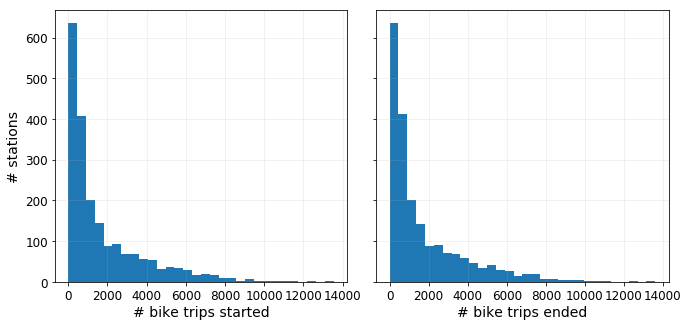

In [58]:
# plot totals over rows
fig, axes = plt.subplots(1, 2, figsize=(11, 5), sharey=True)
fig.subplots_adjust(wspace=0.1)

ax = axes[0]
totals = np.array(row_marginals).sum(axis=0)
ax.hist(totals, bins=30)
ax.set_xlabel('# bike trips started', fontsize=14)
ax.set_ylabel('# stations', fontsize=14)
ax.grid(alpha=0.2)
ax.tick_params(labelsize=12)

ax = axes[1]
totals = np.array(col_marginals).sum(axis=0)
ax.hist(totals, bins=30)
ax.set_xlabel('# bike trips ended', fontsize=14)
ax.grid(alpha=0.2)
ax.tick_params(labelsize=12)

plt.savefig('figs/bikeshare_stations_num_trips.pdf', bbox_inches='tight')

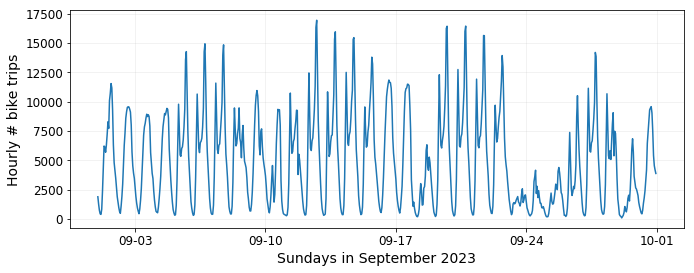

In [59]:
import datetime
import matplotlib.dates as mdates

# plot totals over hours
totals = [np.sum(p) for p in row_marginals]
fig, ax = plt.subplots(figsize=(11,4))
ax.plot(hours, totals)
ax.xaxis.set_major_locator(mdates.WeekdayLocator(mdates.SU, interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax.set_xlabel('Sundays in September 2023', fontsize=14)
ax.set_ylabel('Hourly # bike trips', fontsize=14)
ax.tick_params(labelsize=12)
ax.grid(alpha=.2)
plt.savefig('figs/bikeshare_num_trips_over_hours.pdf', bbox_inches='tight')

## Fit distance function for gravity model

In [60]:
# get monthly visits and fit distance function
dt = datetime.datetime(2023, 9, 1)
X, p, q, true_mat = prep_bikeshare_data_for_ipf(dt, timeagg='month')
distances, params = fit_distance_function(X)

Prepping bikeshare data for 2023-09-01 00...
Aggregated to month-level -> 568745 pairs (13.72%)
Estimated distance parameters: alpha=-0.5863, beta=38.5202


In [61]:
# get num station pairs and mean trip count per distance interval
dist_points = np.linspace(0, 0.25, 251)
print(dist_points[:5])
mids = []
num_pairs = []
trips = []
lower = []
upper = []
for i in range(1, len(dist_points)):
    min_dist, max_dist = dist_points[i-1], dist_points[i]
    in_range = (distances >= min_dist) & (distances < max_dist)
    mids.append(np.mean([min_dist, max_dist]))
    num_pairs.append(in_range.sum())
    trips.append(np.mean(X[in_range]))
    lower.append(np.percentile(X[in_range], 2.5))
    upper.append(np.percentile(X[in_range], 97.5))
print(np.sum(num_pairs)/len(distances.flatten()))  # proportion of pairs included

[0.    0.001 0.002 0.003 0.004]
0.9992082591930709


In [64]:
# get random sample of data points to plot
x = distances.flatten()
print(len(x))
y = X.flatten()
np.random.seed(0)
random_sample = np.random.choice(len(x), size=10000, replace=False)
print(random_sample[:10])

4145296
[1238709 2724397 2456805 1750107 3547265  334079 2038851 2746620 1746810
 3073431]


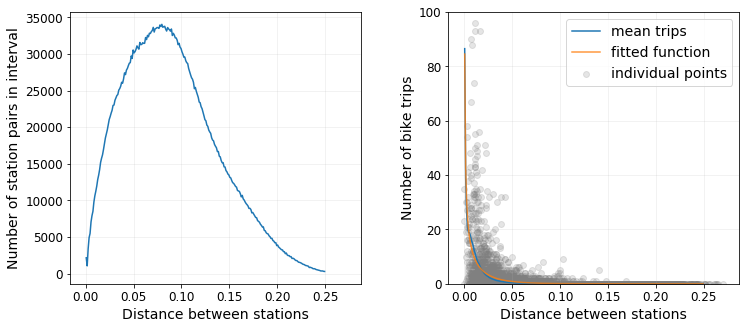

In [67]:
fig, axes = plt.subplots(1, 2, figsize=(12,5), sharex=True)
fig.subplots_adjust(wspace=0.3)

ax = axes[0]
ax.plot(mids, num_pairs)
ax.set_xlabel('Distance between stations', fontsize=14)
ax.set_ylabel('Number of station pairs in interval', fontsize=14)

ax = axes[1]
ax.plot(mids, trips, label='mean trips', color='tab:blue')
# ax.fill_between(mids, lower, upper, color='tab:blue', alpha=0.5)
plt.scatter(x[random_sample], y[random_sample], label='individual points', alpha=0.2, color='grey')
ax.plot(mids, [dist_func(d, params[0], params[1]) for d in mids], label='fitted function', color='tab:orange', alpha=0.8)
ax.legend(fontsize=14)
ax.set_xlabel('Distance between stations', fontsize=14)
ax.set_ylabel('Number of bike trips', fontsize=14)
ax.set_ylim(0, 100)

for ax in axes:
    ax.tick_params(labelsize=12)
    ax.grid(alpha=0.2)
plt.savefig('figs/distance_vs_num_bike_trips.pdf', bbox_inches='tight')

## Evaluate ability to infer ground-truth network

In [68]:
# collect all results from day
dt = datetime.datetime(2023, 9, 1)
l2_dict, pearson_dict, cosine_dict = evaluate_results_on_bikeshare(dt)

Prepping bikeshare data for 2023-09-01 00...
Aggregated to month-level -> 568745 pairs (13.72%)
Prepping bikeshare data for 2023-09-01 00...
Aggregated to week-level -> 292294 pairs (7.05%)
Prepping bikeshare data for 2023-09-01 00...
Aggregated to day-level -> 84421 pairs (2.04%)
Estimated distance parameters: alpha=-0.5863, beta=38.5202

 2023-09-01-00
ipf_month L2=0.941, Pearson r=0.339, cosine sim=0.340
ipf_week L2=0.932, Pearson r=0.364, cosine sim=0.364
ipf_day L2=0.881, Pearson r=0.474, cosine sim=0.474
gravity L2=1.063, Pearson r=0.218, cosine sim=0.218
baseline_no_mat L2=0.996, Pearson r=0.086, cosine sim=0.088


/dfs/scratch0/serinac/ipf/experiments_with_data.py:535: RuntimeWarning: invalid value encountered in true_divide
  row_factors = p / row_sums


baseline_no_col L2=0.972, Pearson r=0.237, cosine sim=0.238


/dfs/scratch0/serinac/ipf/experiments_with_data.py:546: RuntimeWarning: invalid value encountered in true_divide
  col_factors = q / col_sums


baseline_no_row L2=0.972, Pearson r=0.236, cosine sim=0.237
baseline_scale_month L2=0.993, Pearson r=0.116, cosine sim=0.118
baseline_scale_week L2=0.992, Pearson r=0.125, cosine sim=0.126
baseline_scale_day L2=0.985, Pearson r=0.170, cosine sim=0.171

 2023-09-01-01
ipf_month L2=0.950, Pearson r=0.312, cosine sim=0.312
ipf_week L2=0.940, Pearson r=0.344, cosine sim=0.344
ipf_day L2=0.892, Pearson r=0.453, cosine sim=0.453
gravity L2=1.059, Pearson r=0.208, cosine sim=0.208
baseline_no_mat L2=0.996, Pearson r=0.087, cosine sim=0.088
baseline_no_col L2=0.982, Pearson r=0.187, cosine sim=0.187
baseline_no_row L2=0.984, Pearson r=0.179, cosine sim=0.180
baseline_scale_month L2=0.996, Pearson r=0.089, cosine sim=0.090
baseline_scale_week L2=0.996, Pearson r=0.093, cosine sim=0.095
baseline_scale_day L2=0.992, Pearson r=0.129, cosine sim=0.130

 2023-09-01-02
ipf_month L2=0.950, Pearson r=0.312, cosine sim=0.312
ipf_week L2=0.924, Pearson r=0.384, cosine sim=0.384
ipf_day L2=0.826, Pearson 

baseline_scale_week L2=0.968, Pearson r=0.251, cosine sim=0.253
baseline_scale_day L2=0.954, Pearson r=0.302, cosine sim=0.304

 2023-09-01-09
ipf_month L2=0.947, Pearson r=0.319, cosine sim=0.321
ipf_week L2=0.941, Pearson r=0.337, cosine sim=0.339
ipf_day L2=0.902, Pearson r=0.432, cosine sim=0.433
gravity L2=1.344, Pearson r=0.132, cosine sim=0.133
baseline_no_mat L2=0.992, Pearson r=0.122, cosine sim=0.127
baseline_no_col L2=0.960, Pearson r=0.278, cosine sim=0.280
baseline_no_row L2=0.963, Pearson r=0.269, cosine sim=0.271
baseline_scale_month L2=0.972, Pearson r=0.233, cosine sim=0.235
baseline_scale_week L2=0.971, Pearson r=0.238, cosine sim=0.240
baseline_scale_day L2=0.955, Pearson r=0.299, cosine sim=0.301

 2023-09-01-10
ipf_month L2=0.940, Pearson r=0.341, cosine sim=0.343
ipf_week L2=0.933, Pearson r=0.359, cosine sim=0.360
ipf_day L2=0.894, Pearson r=0.447, cosine sim=0.448
gravity L2=1.290, Pearson r=0.173, cosine sim=0.174
baseline_no_mat L2=0.993, Pearson r=0.111, cosi

baseline_scale_day L2=0.909, Pearson r=0.415, cosine sim=0.417

 2023-09-01-17
ipf_month L2=0.904, Pearson r=0.426, cosine sim=0.428
ipf_week L2=0.895, Pearson r=0.444, cosine sim=0.446
ipf_day L2=0.840, Pearson r=0.541, cosine sim=0.543
gravity L2=1.487, Pearson r=0.232, cosine sim=0.233
baseline_no_mat L2=0.990, Pearson r=0.134, cosine sim=0.140
baseline_no_col L2=0.926, Pearson r=0.377, cosine sim=0.379
baseline_no_row L2=0.924, Pearson r=0.381, cosine sim=0.383
baseline_scale_month L2=0.951, Pearson r=0.306, cosine sim=0.309
baseline_scale_week L2=0.941, Pearson r=0.336, cosine sim=0.338
baseline_scale_day L2=0.898, Pearson r=0.439, cosine sim=0.441

 2023-09-01-18
ipf_month L2=0.917, Pearson r=0.397, cosine sim=0.399
ipf_week L2=0.905, Pearson r=0.424, cosine sim=0.426
ipf_day L2=0.844, Pearson r=0.535, cosine sim=0.536
gravity L2=1.467, Pearson r=0.230, cosine sim=0.231
baseline_no_mat L2=0.991, Pearson r=0.128, cosine sim=0.134
baseline_no_col L2=0.935, Pearson r=0.352, cosine s

In [69]:
means = {k:np.mean(v) for k,v in cosine_dict.items()}
for k,v in means.items():
    print(k, np.round(v, 3))
print()
print('ipf_month vs gravity: %.3f' % (means['ipf_month']/means['gravity']-1))
print('ipf_month vs baseline_no_mat: %.3f' % (means['ipf_month']/means['baseline_no_mat']-1))
print('ipf_month vs baseline_no_col: %.3f' % (means['ipf_month']/means['baseline_no_col']-1))
print('ipf_month vs baseline_no_row: %.3f' % (means['ipf_month']/means['baseline_no_row']-1))
print('ipf_month vs day-aggregated: %.3f' % (means['ipf_month']/means['baseline_scale_day']-1))
print('ipf_day vs ipf_week: %.2f' % (means['ipf_day']/means['ipf_week']-1))
print('ipf_week vs ipf_month: %.2f' % (means['ipf_week']/means['ipf_month']-1))

ipf_month 0.363
ipf_week 0.389
ipf_day 0.496
gravity 0.204
baseline_no_mat 0.116
baseline_no_col 0.278
baseline_no_row 0.275
baseline_scale_month 0.201
baseline_scale_week 0.215
baseline_scale_day 0.278

ipf_month vs gravity: 0.780
ipf_month vs baseline_no_mat: 2.137
ipf_month vs baseline_no_col: 0.307
ipf_month vs baseline_no_row: 0.323
ipf_month vs day-aggregated: 0.307
ipf_day vs ipf_week: 0.27
ipf_week vs ipf_month: 0.07


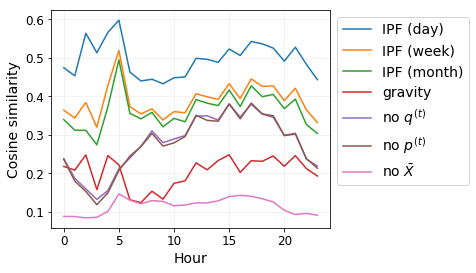

In [71]:
labels = {'ipf_day': 'IPF (day)', 'ipf_week': 'IPF (week)', 'ipf_month': 'IPF (month)',
          'gravity': 'gravity', 'baseline_no_mat': 'no $\\bar{X}$', 
          'baseline_no_row': 'no $p^{(t)}$', 'baseline_no_col': 'no $q^{(t)}$',
          'baseline_scale_month': 'scale month', 'baseline_scale_week': 'scale week',
          'baseline_scale_day': 'scale day'}

# main results
methods = ['ipf_day', 'ipf_week', 'ipf_month', 'gravity', 
          'baseline_no_col', 'baseline_no_row', 'baseline_no_mat']
fig, ax = plt.subplots(figsize=(5, 4))
for m in methods:
    vals = cosine_dict[m]
    ax.plot(vals, label=labels[m])
ax.grid(alpha=0.2)
ax.set_xlabel('Hour', fontsize=14)
ax.set_ylabel('Cosine similarity', fontsize=14)
ax.legend(fontsize=14, bbox_to_anchor=(1, 1))
ax.tick_params(labelsize=12)
plt.savefig('figs/main_results_on_bikeshare.pdf', bbox_inches='tight')

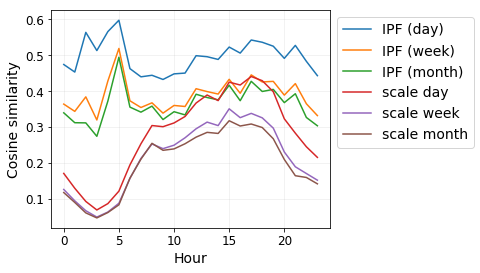

In [74]:
# extended results
methods = ['ipf_day', 'ipf_week', 'ipf_month', 
           'baseline_scale_day', 'baseline_scale_week', 'baseline_scale_month']
fig, ax = plt.subplots(figsize=(5, 4))
means = {}
for m in methods:
    vals = cosine_dict[m]
    ax.plot(vals, label=labels[m])
    means[m] = np.mean(vals)
ax.grid(alpha=0.2)
ax.set_xlabel('Hour', fontsize=14)
ax.set_ylabel('Cosine similarity', fontsize=14)
ax.legend(fontsize=14, bbox_to_anchor=(1, 1))
ax.tick_params(labelsize=12)
plt.savefig('figs/extended_results_on_bikeshare.pdf', bbox_inches='tight')

## Evaluate performance over iterations

In [75]:
ipf_out = {}
dt = datetime.datetime(2023, 9, 1, 0)
X, p, q, true_mat = prep_bikeshare_data_for_ipf(dt, timeagg='month', hours=None, networks=None)
ipf_out[dt] = do_ipf(X, p, q, num_iter=100, return_all_factors=True)

Prepping bikeshare data for 2023-09-01 00...
Aggregated to month-level -> 568745 pairs (13.72%)
Running IPF for max 100 iterations
Iter 0: row err = 0.0000, col err = 1634.0081
Iter 1: row err = 236.6393, col err = 0.0000
Iter 2: row err = 0.0000, col err = 153.0595
Iter 3: row err = 125.4210, col err = 0.0000
Iter 4: row err = 0.0000, col err = 108.9163
Iter 5: row err = 94.0360, col err = 0.0000
Iter 6: row err = 0.0000, col err = 82.5705
Iter 7: row err = 71.9821, col err = 0.0000
Iter 8: row err = 0.0000, col err = 63.2604
Iter 9: row err = 55.1834, col err = 0.0000
Iter 10: row err = 0.0000, col err = 48.3696
Iter 11: row err = 42.1529, col err = 0.0000
Iter 12: row err = 0.0000, col err = 36.8643
Iter 13: row err = 32.0984, col err = 0.0000
Iter 14: row err = 0.0000, col err = 28.0405
Iter 15: row err = 24.3816, col err = 0.0000
Iter 16: row err = 0.0000, col err = 21.3093
Iter 17: row err = 18.4990, col err = 0.0000
Iter 18: row err = 0.0000, col err = 16.1869
Iter 19: row err =

In [76]:
dt = datetime.datetime(2023, 9, 1, 6)
X, p, q, true_mat = prep_bikeshare_data_for_ipf(dt, timeagg='month', hours=None, networks=None)
ipf_out[dt] = do_ipf(X, p, q, num_iter=100, return_all_factors=True)

Prepping bikeshare data for 2023-09-01 06...
Aggregated to month-level -> 568745 pairs (13.72%)
Running IPF for max 100 iterations
Iter 0: row err = 0.0000, col err = 1976.9028
Iter 1: row err = 309.5168, col err = 0.0000
Iter 2: row err = 0.0000, col err = 169.9698
Iter 3: row err = 122.9651, col err = 0.0000
Iter 4: row err = 0.0000, col err = 99.9170
Iter 5: row err = 84.8659, col err = 0.0000
Iter 6: row err = 0.0000, col err = 73.1134
Iter 7: row err = 64.1995, col err = 0.0000
Iter 8: row err = 0.0000, col err = 55.8367
Iter 9: row err = 49.4894, col err = 0.0000
Iter 10: row err = 0.0000, col err = 42.9141
Iter 11: row err = 38.1421, col err = 0.0000
Iter 12: row err = 0.0000, col err = 32.9896
Iter 13: row err = 29.3688, col err = 0.0000
Iter 14: row err = 0.0000, col err = 25.3670
Iter 15: row err = 22.6048, col err = 0.0000
Iter 16: row err = 0.0000, col err = 19.5138
Iter 17: row err = 17.4026, col err = 0.0000
Iter 18: row err = 0.0000, col err = 15.0295
Iter 19: row err = 

In [77]:
dt = datetime.datetime(2023, 9, 1, 12)
X, p, q, true_mat = prep_bikeshare_data_for_ipf(dt, timeagg='month', hours=None, networks=None)
ipf_out[dt] = do_ipf(X, p, q, num_iter=100, return_all_factors=True)

Prepping bikeshare data for 2023-09-01 12...
Aggregated to month-level -> 568745 pairs (13.72%)
Running IPF for max 100 iterations
Iter 0: row err = 0.0000, col err = 3173.5205
Iter 1: row err = 372.9448, col err = 0.0000
Iter 2: row err = 0.0000, col err = 182.8672
Iter 3: row err = 134.8258, col err = 0.0000
Iter 4: row err = 0.0000, col err = 104.6447
Iter 5: row err = 85.3239, col err = 0.0000
Iter 6: row err = 0.0000, col err = 70.0524
Iter 7: row err = 59.0158, col err = 0.0000
Iter 8: row err = 0.0000, col err = 49.8081
Iter 9: row err = 43.0474, col err = 0.0000
Iter 10: row err = 0.0000, col err = 37.3644
Iter 11: row err = 33.0822, col err = 0.0000
Iter 12: row err = 0.0000, col err = 29.1549
Iter 13: row err = 26.0604, col err = 0.0000
Iter 14: row err = 0.0000, col err = 23.0599
Iter 15: row err = 20.6793, col err = 0.0000
Iter 16: row err = 0.0000, col err = 18.3318
Iter 17: row err = 16.4834, col err = 0.0000
Iter 18: row err = 0.0000, col err = 14.6395
Iter 19: row err =

In [78]:
dt = datetime.datetime(2023, 9, 1, 18)
X, p, q, true_mat = prep_bikeshare_data_for_ipf(dt, timeagg='month', hours=None, networks=None)
ipf_out[dt] = do_ipf(X, p, q, num_iter=100, return_all_factors=True)

Prepping bikeshare data for 2023-09-01 18...
Aggregated to month-level -> 568745 pairs (13.72%)
Running IPF for max 100 iterations
Iter 0: row err = 0.0000, col err = 4705.7956
Iter 1: row err = 602.6192, col err = 0.0000
Iter 2: row err = 0.0000, col err = 291.2351
Iter 3: row err = 214.1057, col err = 0.0000
Iter 4: row err = 0.0000, col err = 178.9431
Iter 5: row err = 155.0840, col err = 0.0000
Iter 6: row err = 0.0000, col err = 137.1296
Iter 7: row err = 120.9053, col err = 0.0000
Iter 8: row err = 0.0000, col err = 107.5453
Iter 9: row err = 95.0608, col err = 0.0000
Iter 10: row err = 0.0000, col err = 84.6804
Iter 11: row err = 74.9085, col err = 0.0000
Iter 12: row err = 0.0000, col err = 66.7990
Iter 13: row err = 59.1169, col err = 0.0000
Iter 14: row err = 0.0000, col err = 52.7845
Iter 15: row err = 46.7507, col err = 0.0000
Iter 16: row err = 0.0000, col err = 41.8363
Iter 17: row err = 37.1314, col err = 0.0000
Iter 18: row err = 0.0000, col err = 33.3619
Iter 19: row e

In [81]:
# compute cosine similarity on true network
num_iters = 30
dt2cossims = {}
for hour in np.arange(0, 24, 6):
    dt = datetime.datetime(2023, 9, 1, hour)
    X, p, q, real_mat = prep_bikeshare_data_for_ipf(dt, timeagg='month', hours=None, networks=None)
    output = ipf_out[dt]
    row_factors, col_factors = output[1], output[2]
    assert len(row_factors) == 100 and len(col_factors) == 100
    cossims = []
    for it in range(num_iters):  # first 30 iterations
        est_mat = np.diag(row_factors[it]) @ X @ np.diag(col_factors[it])
        _, _, cossim = eval_est_mat(est_mat, real_mat, verbose=False)
        cossims.append(cossim)
    dt2cossims[dt] = cossims

Prepping bikeshare data for 2023-09-01 00...
Aggregated to month-level -> 568745 pairs (13.72%)
Prepping bikeshare data for 2023-09-01 06...
Aggregated to month-level -> 568745 pairs (13.72%)
Prepping bikeshare data for 2023-09-01 12...
Aggregated to month-level -> 568745 pairs (13.72%)
Prepping bikeshare data for 2023-09-01 18...
Aggregated to month-level -> 568745 pairs (13.72%)


<>:14: DeprecationWarning: invalid escape sequence \e
<>:17: DeprecationWarning: invalid escape sequence \e
<>:14: DeprecationWarning: invalid escape sequence \e
<>:17: DeprecationWarning: invalid escape sequence \e
<>:14: DeprecationWarning: invalid escape sequence \e
<>:17: DeprecationWarning: invalid escape sequence \e
<ipython-input-83-125f4bfff421>:14: DeprecationWarning: invalid escape sequence \e
  ax.set_ylabel('$\ell_1$ error on marginals $p$ and $q$ (log)', fontsize=14)
<ipython-input-83-125f4bfff421>:17: DeprecationWarning: invalid escape sequence \e
  ax.set_ylabel('$\ell_1$ error on marginals $p$ and $q$', fontsize=14)


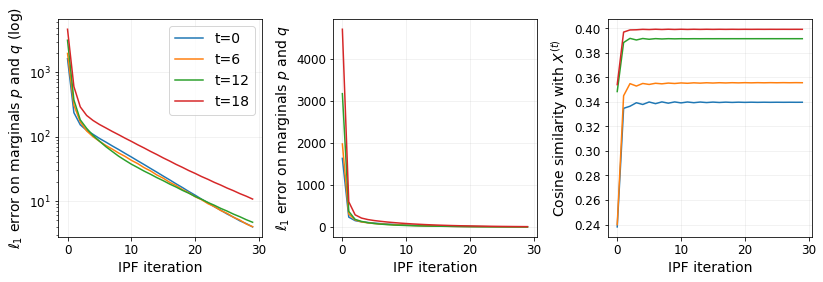

In [83]:
fig, axes = plt.subplots(1, 3, figsize=(13.5, 4), sharex=True)
fig.subplots_adjust(wspace=0.35)
for hour in np.arange(0, 24, 6):
    dt = datetime.datetime(2023, 9, 1, hour)
    _, row_factors, col_factors, row_errs, col_errs = ipf_out[dt]
    # plot L1 error on marginals
    axes[0].plot(np.array(row_errs[:num_iters])+np.array(col_errs[:num_iters]), label=f't={hour}')
    axes[1].plot(np.array(row_errs[:num_iters])+np.array(col_errs[:num_iters]))
    # plot cosine sim over iterations
    axes[2].plot(dt2cossims[dt])
    
ax = axes[0]
ax.legend(fontsize=14)
ax.set_ylabel('$\ell_1$ error on marginals $p$ and $q$ (log)', fontsize=14)
ax.set_yscale('log')
ax = axes[1]
ax.set_ylabel('$\ell_1$ error on marginals $p$ and $q$', fontsize=14)
ax = axes[2]
ax.set_ylabel('Cosine similarity with $X^{(t)}$', fontsize=14)
for ax in axes:
    ax.set_xlabel('IPF iteration', fontsize=14)
    ax.grid(alpha=0.2)
    ax.tick_params(labelsize=12)
plt.savefig('figs/bikeshare_over_iters.pdf', bbox_inches='tight')

## Test assumptions

In [87]:
# stationarity assumption
timeagg = 'month'
mats = []
for date in np.arange(1, 31):
    print(date)
    for hr in range(24):
        curr_dt = datetime.datetime(2023, 9, date, hr)
        fn = 'ipf-output/bikeshare_%s_%s.pkl' % (timeagg, curr_dt.strftime('%Y-%m-%d-%H'))
        if os.path.isfile(fn):
            with open(fn, 'rb') as f:
                ipf_out = pickle.load(f)
        else:
            print('Missing', fn)
        row_factors, col_factors = ipf_out[1], ipf_out[2]
        outer_prod = np.outer(row_factors, col_factors)
        mats.append(outer_prod)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30


In [88]:
sum_mat = 0
for mat in mats:
    assert mat.shape == mats[0].shape
    sum_mat += mat
vals = sum_mat[X > 0]
for i in np.arange(0, 101, 5):
    print(i, np.percentile(vals, i))

0 0.12305341714696763
5 0.8811288758883717
10 0.9190536175681564
15 0.9394289808828642
20 0.9532552194217648
25 0.9637729268651173
30 0.9724955243657903
35 0.9802212753672688
40 0.9872633799910313
45 0.9941143870278875
50 1.0010265785030033
55 1.0082173442480635
60 1.0161279815305844
65 1.0251111197614937
70 1.0357915690899402
75 1.0489453817410561
80 1.0656919334189474
85 1.0886204322033572
90 1.1228762177178264
95 1.1881816996563712
100 4.072847969826011


In [86]:
from scipy.stats import chi2

# dispersion parameter
for timeagg in ['month', 'week', 'day']:
    pvals = []
    phis = []
    for hr in range(24):
        dt = datetime.datetime(2023, 9, 1, hr)
        num_params, residuals, exp = analyze_poisson_residuals(dt, timeagg)
        pval = 1 - chi2.cdf(np.sum(residuals ** 2), len(residuals)-num_params-1)
        pvals.append(pval)
        phi = np.sum(residuals ** 2) / (len(residuals)-num_params)
        phis.append(phi)
    print('Time aggregation:', timeagg)
    print('Failed goodness-of-fit:', np.sum(np.array(pvals) < 0.05))
    print('Dispersion parameter: mean = %.3f, 25th percentile = %.3f, 75th percentile = %.3f' % 
         (np.mean(phis), np.percentile(phis, 25), np.percentile(phis, 75)))

Prepping bikeshare data for 2023-09-01 00...
Aggregated to month-level -> 568745 pairs (13.72%)
Kept shape with nonzero marginals: (809, 869)
Num observations kept: 199228, 197523 (99.14%) is zero
Corr between observed values and expected values: r=0.330, p=0.000
Corr between expected values and pearson residuals: r=-0.001, p=0.750
Prepping bikeshare data for 2023-09-01 01...
Aggregated to month-level -> 568745 pairs (13.72%)
Kept shape with nonzero marginals: (639, 698)
Num observations kept: 130186, 129050 (99.13%) is zero
Corr between observed values and expected values: r=0.301, p=0.000
Corr between expected values and pearson residuals: r=0.000, p=0.901
Prepping bikeshare data for 2023-09-01 02...
Aggregated to month-level -> 568745 pairs (13.72%)
Kept shape with nonzero marginals: (446, 497)
Num observations kept: 67971, 67303 (99.02%) is zero
Corr between observed values and expected values: r=0.299, p=0.000
Corr between expected values and pearson residuals: r=-0.004, p=0.301
P

Kept shape with nonzero marginals: (809, 869)
Num observations kept: 115881, 114176 (98.53%) is zero
Corr between observed values and expected values: r=0.348, p=0.000
Corr between expected values and pearson residuals: r=-0.000, p=0.923
Prepping bikeshare data for 2023-09-01 01...
Aggregated to week-level -> 292294 pairs (7.05%)
Kept shape with nonzero marginals: (639, 698)
Num observations kept: 77068, 75932 (98.53%) is zero
Corr between observed values and expected values: r=0.326, p=0.000
Corr between expected values and pearson residuals: r=0.001, p=0.791
Prepping bikeshare data for 2023-09-01 02...
Aggregated to week-level -> 292294 pairs (7.05%)
Kept shape with nonzero marginals: (446, 497)
Num observations kept: 40761, 40093 (98.36%) is zero
Corr between observed values and expected values: r=0.368, p=0.000
Corr between expected values and pearson residuals: r=-0.002, p=0.752
Prepping bikeshare data for 2023-09-01 03...
Aggregated to week-level -> 292294 pairs (7.05%)
Kept shap

Kept shape with nonzero marginals: (639, 698)
Num observations kept: 26490, 25354 (95.71%) is zero
Corr between observed values and expected values: r=0.417, p=0.000
Corr between expected values and pearson residuals: r=0.001, p=0.836
Prepping bikeshare data for 2023-09-01 02...
Aggregated to day-level -> 84421 pairs (2.04%)
Kept shape with nonzero marginals: (446, 497)
Num observations kept: 14301, 13633 (95.33%) is zero
Corr between observed values and expected values: r=0.538, p=0.000
Corr between expected values and pearson residuals: r=-0.001, p=0.942
Prepping bikeshare data for 2023-09-01 03...
Aggregated to day-level -> 84421 pairs (2.04%)
Kept shape with nonzero marginals: (305, 333)
Num observations kept: 6886, 6478 (94.07%) is zero
Corr between observed values and expected values: r=0.468, p=0.000
Corr between expected values and pearson residuals: r=-0.001, p=0.939
Prepping bikeshare data for 2023-09-01 04...
Aggregated to day-level -> 84421 pairs (2.04%)
Kept shape with non

Prepping bikeshare data for 2023-09-01 00...
Aggregated to month-level -> 568745 pairs (13.72%)
Kept shape with nonzero marginals: (809, 869)
Num observations kept: 199228, 197523 (99.14%) is zero
Corr between observed values and expected values: r=0.330, p=0.000
Corr between expected values and pearson residuals: r=-0.001, p=0.750
Corr btwn distances and pearson residuals: r=-0.001, p=0.627
Prop negative: 0.9914520047382898
(0.4183020932661173, 0.0)
SpearmanrResult(correlation=0.5316472349497787, pvalue=0.0)
Prop positive: 0.008547995261710201
(0.47528088090007325, 1.0825986261762287e-96)
SpearmanrResult(correlation=0.6094377944626749, pvalue=1.0235170177583838e-173)


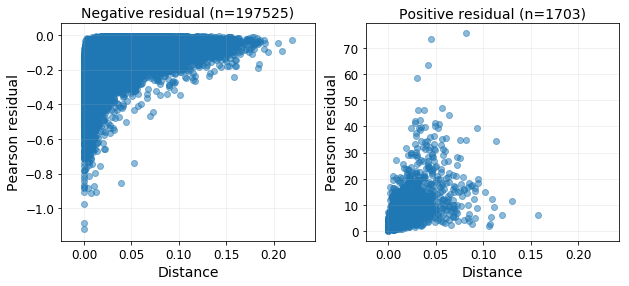

In [93]:
dt = datetime.datetime(2023, 9, 1, 0)
timeagg = 'month'
pairwise_dist = get_distances_between_stations()
num_params, residuals, exp, dist_keep = analyze_poisson_residuals(dt, timeagg, dist_mat=pairwise_dist)

# plot Pearson residuals
fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharex=True)
ax = axes[0]
neg_res = residuals < 0
print('Prop negative:', neg_res.mean())
print(pearsonr(dist_keep[neg_res], residuals[neg_res]))
print(spearmanr(dist_keep[neg_res], residuals[neg_res]))
ax.set_title('Negative residual (n=%d)' % neg_res.sum(), fontsize=14)
ax.scatter(dist_keep[neg_res], residuals[neg_res], alpha=0.5)

ax = axes[1]
pos_res = residuals >= 0
print('Prop positive:', pos_res.mean())
print(pearsonr(dist_keep[pos_res], residuals[pos_res]))
print(spearmanr(dist_keep[pos_res], residuals[pos_res]))
ax.set_title('Positive residual (n=%d)' % pos_res.sum(), fontsize=14)
ax.scatter(dist_keep[pos_res], residuals[pos_res], alpha=0.5)

for ax in axes:
    ax.set_xlabel('Distance', fontsize=14)
    ax.set_ylabel('Pearson residual', fontsize=14)
    ax.grid(alpha=0.2)
    ax.tick_params(labelsize=12)
plt.savefig('figs/distance-vs-residuals.pdf', bbox_inches='tight')